### Libraries

In [1]:
import pandas as pd#data structures and operations for manipulating numerical tables and time series.
import pandas_datareader.data as data#Up-to-date remote data access for pandas.
import datetime as dt#supplies classes for manipulating dates and times
from datetime import timedelta
import matplotlib.pyplot as plt#plotting library for the Python.
import seaborn as sns;# visualizacion
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
from statsmodels.tsa.ar_model import AR,ARResults# Load specific forecasting tools
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from itertools import product
from math import sqrt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation

In [2]:
#!pip install pandas-datareader
#!pip install seaborn
#!conda install -c plotly plotly
#!pip install pmdarima
#!conda install -c conda-forge fbprophet -y
#!pip install fbprophet
#!pip install pystan==2.17.1.0

### Contents

### I.- Describe Data :

This is research about 2 companies of renewable energy in the stock market. The problematic here is a forecasting, that consists of predicting the values in the future of these companies, we are working with time series.


#### A.- EDP Renováveis (EDPR.LS)

In [3]:
# We define the ticket from the companies that we are interested in research.

ticker = ['EDP.BE']#EDW.BE berlin
                    

# We would like all available data from 01-01-2016 until today
start_date = '2016-01-01'

today = dt.date.today()
yesterday = today - timedelta(days=1)
end_date = yesterday

# User pandas_reader.data.DataReader to load the desired data.
EDPR= data.DataReader('EDP.BE', 'yahoo', start_date, end_date )
EDPR.head(7)

High    Low   Open  Close  Volume  Adj Close
Date                                                     
2016-01-04  3.244  3.244  3.244  3.244     0.0   2.110836
2016-01-05  3.193  3.193  3.193  3.193     0.0   2.077651
2016-01-06  3.156  3.156  3.156  3.156     0.0   2.053575
2016-01-07  3.170  3.102  3.102  3.170  9750.0   2.062686
2016-01-08  3.209  3.209  3.209  3.209     0.0   2.088062
2016-01-11  3.155  3.155  3.155  3.155     0.0   2.052925
2016-01-12  3.178  3.178  3.178  3.178     0.0   2.067891

In [4]:
EDPR.shape

(1611, 6)

In [5]:
EDPR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1611 entries, 2016-01-04 to 2022-05-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1611 non-null   float64
 1   Low        1611 non-null   float64
 2   Open       1611 non-null   float64
 3   Close      1611 non-null   float64
 4   Volume     1611 non-null   float64
 5   Adj Close  1611 non-null   float64
dtypes: float64(6)
memory usage: 88.1 KB


In [6]:
df_EDPR= EDPR.copy()
#filling the missing values for Saturday and Sunday
df_EDPR = df_EDPR.resample('1D').ffill()
df_EDPR = df_EDPR.resample('1D').bfill()

# ADD Frecuency information
df_EDPR.index = pd.DatetimeIndex(df_EDPR.index).to_period('D')

df_EDPR.head(7)

High    Low   Open  Close  Volume  Adj Close
Date                                                     
2016-01-04  3.244  3.244  3.244  3.244     0.0   2.110836
2016-01-05  3.193  3.193  3.193  3.193     0.0   2.077651
2016-01-06  3.156  3.156  3.156  3.156     0.0   2.053575
2016-01-07  3.170  3.102  3.102  3.170  9750.0   2.062686
2016-01-08  3.209  3.209  3.209  3.209     0.0   2.088062
2016-01-09  3.209  3.209  3.209  3.209     0.0   2.088062
2016-01-10  3.209  3.209  3.209  3.209     0.0   2.088062

In [7]:
df_EDPR.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 2318 entries, 2016-01-04 to 2022-05-09
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2318 non-null   float64
 1   Low        2318 non-null   float64
 2   Open       2318 non-null   float64
 3   Close      2318 non-null   float64
 4   Volume     2318 non-null   float64
 5   Adj Close  2318 non-null   float64
dtypes: float64(6)
memory usage: 126.8 KB


In [8]:
df_EDPR.to_csv("EDPR.csv")# reserve and use in modelling

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [9]:
# We define the ticket from the companies that we are interested in research.

ticker = ['VWSB.BE']#'VWDRY' from 0.30 to 0.51
                    
# We would like all available data from 01-01-2016 until today
start_date = '2016-01-01'
today = dt.date.today()
yesterday = today - timedelta(days=1)
end_date = yesterday

VWS= data.DataReader('VWSB.BE', 'yahoo', start_date, end_date)
VWS.head(7)

High     Low    Open   Close  Volume  Adj Close
Date                                                         
2016-01-04  12.986  12.718  12.986  12.738   100.0   6.409401
2016-01-05  12.886  12.674  12.886  12.716     0.0   6.398331
2016-01-06  12.724  12.492  12.586  12.592   435.0   6.335938
2016-01-07  12.354  12.096  12.354  12.272     5.0   6.174923
2016-01-08  12.442  12.000  12.266  12.000     0.0   6.038060
2016-01-11  11.954  11.716  11.866  11.872   250.0   5.973655
2016-01-12  12.180  11.788  11.788  12.178   400.0   6.127625

In [10]:
VWS.shape

(1611, 6)

In [11]:
VWS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1611 entries, 2016-01-04 to 2022-05-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1611 non-null   float64
 1   Low        1611 non-null   float64
 2   Open       1611 non-null   float64
 3   Close      1611 non-null   float64
 4   Volume     1611 non-null   float64
 5   Adj Close  1611 non-null   float64
dtypes: float64(6)
memory usage: 88.1 KB


+ https://uk.finance.yahoo.com/news/vestas-data-compromised-cyber-attack-080110240.html
+ https://uk.finance.yahoo.com/news/vestas-q3-below-expectations-lowers-071243573.html

In [12]:
df_VWS= VWS.copy()
#filling the missing values for Saturday and Sunday
df_VWS = df_VWS.resample('B').ffill()#.interpolate()
df_VWS= df_VWS.resample('B').bfill()#.interpolate()#limit=1
# ADD Frecuency information
# ADD Frecuency information
df_VWS.index = pd.DatetimeIndex(df_VWS.index).to_period('D')
df_VWS.head(7)

High     Low    Open   Close  Volume  Adj Close
Date                                                         
2016-01-04  12.986  12.718  12.986  12.738   100.0   6.409401
2016-01-05  12.886  12.674  12.886  12.716     0.0   6.398331
2016-01-06  12.724  12.492  12.586  12.592   435.0   6.335938
2016-01-07  12.354  12.096  12.354  12.272     5.0   6.174923
2016-01-08  12.442  12.000  12.266  12.000     0.0   6.038060
2016-01-11  11.954  11.716  11.866  11.872   250.0   5.973655
2016-01-12  12.180  11.788  11.788  12.178   400.0   6.127625

In [13]:
df_VWS.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1656 entries, 2016-01-04 to 2022-05-09
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1656 non-null   float64
 1   Low        1656 non-null   float64
 2   Open       1656 non-null   float64
 3   Close      1656 non-null   float64
 4   Volume     1656 non-null   float64
 5   Adj Close  1656 non-null   float64
dtypes: float64(6)
memory usage: 90.6 KB


In [14]:
df_VWS.to_csv("VWS.csv")# reserve and use in modelling

### II.- Exploratory Data Analysis (EDA) 

#### A.- EDP Renováveis (EDPR.LS)

In [15]:
EDPR.describe()

High          Low         Open        Close        Volume  \
count  1611.000000  1611.000000  1611.000000  1611.000000   1611.000000   
mean      3.641706     3.633388     3.635681     3.639111    131.263191   
std       0.717712     0.714609     0.715648     0.716811    939.588480   
min       2.587000     2.570000     2.570000     2.587000      0.000000   
25%       3.028500     3.028500     3.028500     3.028500      0.000000   
50%       3.441000     3.441000     3.441000     3.441000      0.000000   
75%       4.354178     4.350721     4.351500     4.351500      0.000000   
max       5.598000     5.598000     5.598000     5.598000  20439.000000   

         Adj Close  
count  1611.000000  
mean      3.044427  
std       0.959042  
min       1.768573  
25%       2.142083  
50%       2.684834  
75%       4.025879  
max       5.157768

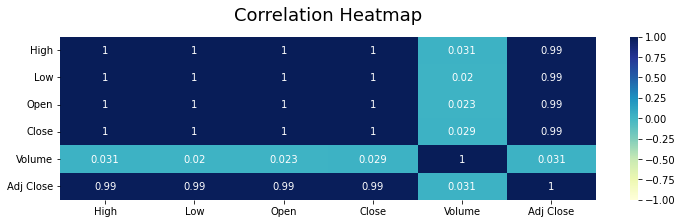

In [16]:
plt.figure(figsize = (12, 3))
heatmap= sns.heatmap(EDPR.corr(),vmin=-1, vmax=1, annot = True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

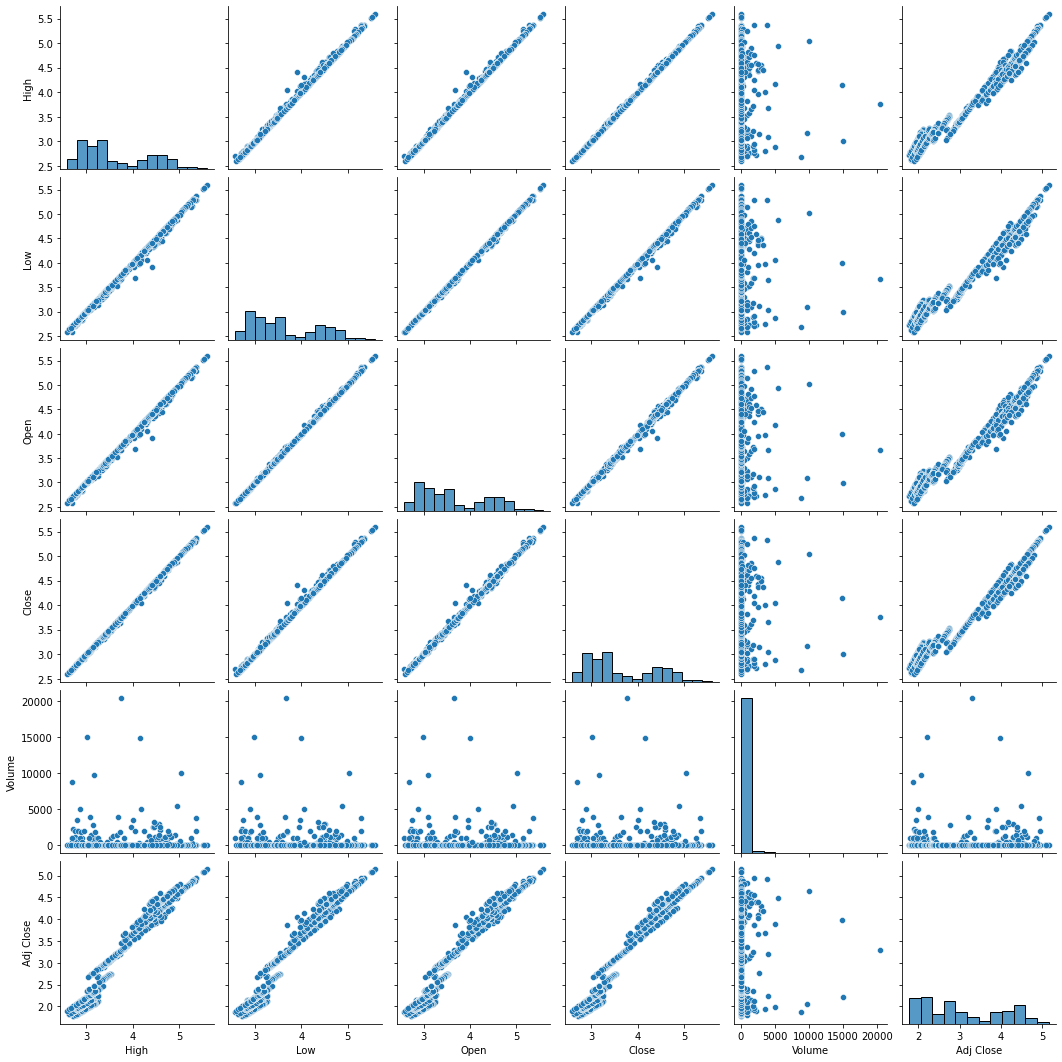

In [17]:
sns.pairplot(EDPR)

<AxesSubplot:>

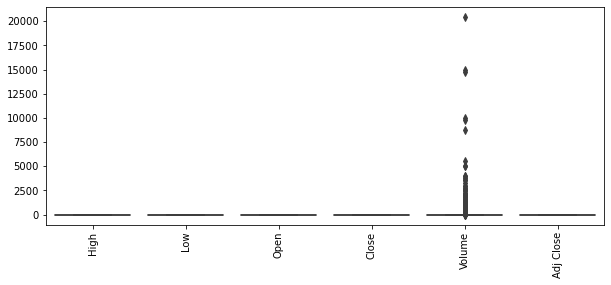

In [18]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=EDPR)

In [19]:
# We selected the main column  for us
close_EDPR= EDPR['Close']

# freq='B' stands for only weekdays
weekdays_EDPR= pd.date_range(start=start_date, end=end_date, freq='B')

 # We need reindex close using all weekdays as the new index.
close_EDPR= close_EDPR.reindex(weekdays_EDPR)

#We filling the Missing values (NaN) with 'forward fill'
close_EDPR = close_EDPR.fillna(method='ffill')
close_EDPR = close_EDPR.dropna()# delete NaNs if there are more.
#we passed the information into Dataframe and rename the columns
close_EDPR = pd.DataFrame(close_EDPR).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_EDPR.tail()

Close
2022-05-03  4.354
2022-05-04  4.378
2022-05-05  4.406
2022-05-06  4.242
2022-05-09  4.411

In [20]:
close_EDPR.tail()

Close
2022-05-03  4.354
2022-05-04  4.378
2022-05-05  4.406
2022-05-06  4.242
2022-05-09  4.411

In [21]:
close_EDPR.describe()

Close
count  1656.000000
mean      3.641399
std       0.717216
min       2.587000
25%       3.033000
50%       3.441000
75%       4.351250
max       5.598000

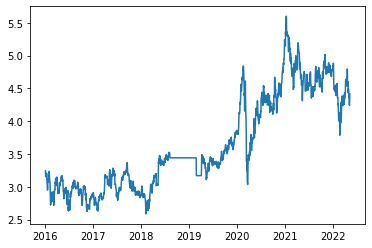

In [22]:
plt.plot(close_EDPR["Close"],label='EDPR Close Price history')

In [23]:
EDPR_df = close_EDPR
EDPR_df 

Close
2016-01-04  3.244
2016-01-05  3.193
2016-01-06  3.156
2016-01-07  3.170
2016-01-08  3.209
...           ...
2022-05-03  4.354
2022-05-04  4.378
2022-05-05  4.406
2022-05-06  4.242
2022-05-09  4.411

[1656 rows x 1 columns]

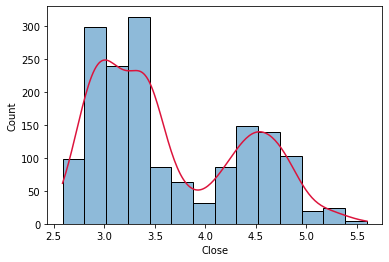

In [24]:
ax= sns.histplot(EDPR_df['Close'], kde=True);
ax.lines[0].set_color('crimson')

In [25]:
EDPR_df.to_csv("EDPR_df.csv")

In [26]:
EDPR_df= pd.read_csv('EDPR_df.csv')#We decided works with a CSV for modeling 
EDPR_df.tail()

Unnamed: 0  Close
1651  2022-05-03  4.354
1652  2022-05-04  4.378
1653  2022-05-05  4.406
1654  2022-05-06  4.242
1655  2022-05-09  4.411

In [27]:
#Renaming column Unnamed: 0
list(EDPR_df.columns)

EDPR_df = EDPR_df.rename(columns={'Unnamed: 0': 'Date'})

In [28]:
EDPR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1656 non-null   object 
 1   Close   1656 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.0+ KB


In [29]:
EDPR_df= EDPR_df[['Date', 'Close']]
EDPR_df

Date  Close
0     2016-01-04  3.244
1     2016-01-05  3.193
2     2016-01-06  3.156
3     2016-01-07  3.170
4     2016-01-08  3.209
...          ...    ...
1651  2022-05-03  4.354
1652  2022-05-04  4.378
1653  2022-05-05  4.406
1654  2022-05-06  4.242
1655  2022-05-09  4.411

[1656 rows x 2 columns]

In [30]:
#we define date and we reindex the dataframe
EDPR_df.index = EDPR_df["Date"]

In [31]:
EDPR_df= EDPR_df.sort_index(ascending=True,axis=0)
df_1= pd.DataFrame(index=range(0,len(EDPR_df)),columns=['Date','Close'])
for i in range(0,len(df_1)):
    df_1["Close"][i]=EDPR_df["Close"][i]
    df_1["Date"][i]=EDPR_df['Date'][i]

EDPR_df = df_1
#convert  the Date data to datatime Type
EDPR_df["Date"] = pd.to_datetime(EDPR_df.Date, format="%Y/%m/%d")
EDPR_df.tail()

Date  Close
1651 2022-05-03  4.354
1652 2022-05-04  4.378
1653 2022-05-05  4.406
1654 2022-05-06  4.242
1655 2022-05-09  4.411

In [32]:
EDPR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1656 non-null   datetime64[ns]
 1   Close   1656 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 26.0+ KB


#### B.- Vestas Wind Systems A/S (VWS.CO)

In [33]:
VWS.describe()

High          Low         Open        Close       Volume  \
count  1611.000000  1611.000000  1611.000000  1611.000000  1611.000000   
mean     18.844715    18.356748    18.624909    18.610543   140.026691   
std       8.178903     7.869609     8.060624     8.039099   472.773286   
min       9.847000     9.649000     9.649000     9.700000     0.000000   
25%      12.504000    12.255000    12.417000    12.399000     0.000000   
50%      15.270000    15.022000    15.158000    15.176000     0.000000   
75%      25.020000    24.265000    24.765000    24.755000    25.000000   
max      42.939999    41.860001    42.500000    42.360001  7350.000000   

         Adj Close  
count  1611.000000  
mean     15.517676  
std       9.411940  
min       5.123293  
25%       8.260917  
50%      11.159528  
75%      23.655692  
max      39.717422

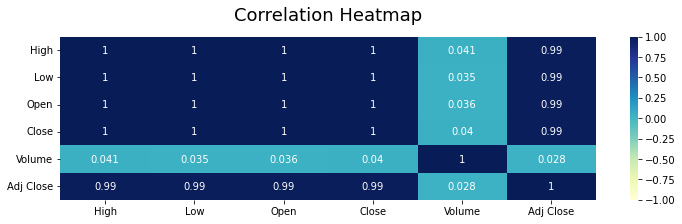

In [34]:
plt.figure(figsize = (12, 3))
heatmap= sns.heatmap(VWS.corr(),vmin=-1, vmax=1, annot = True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

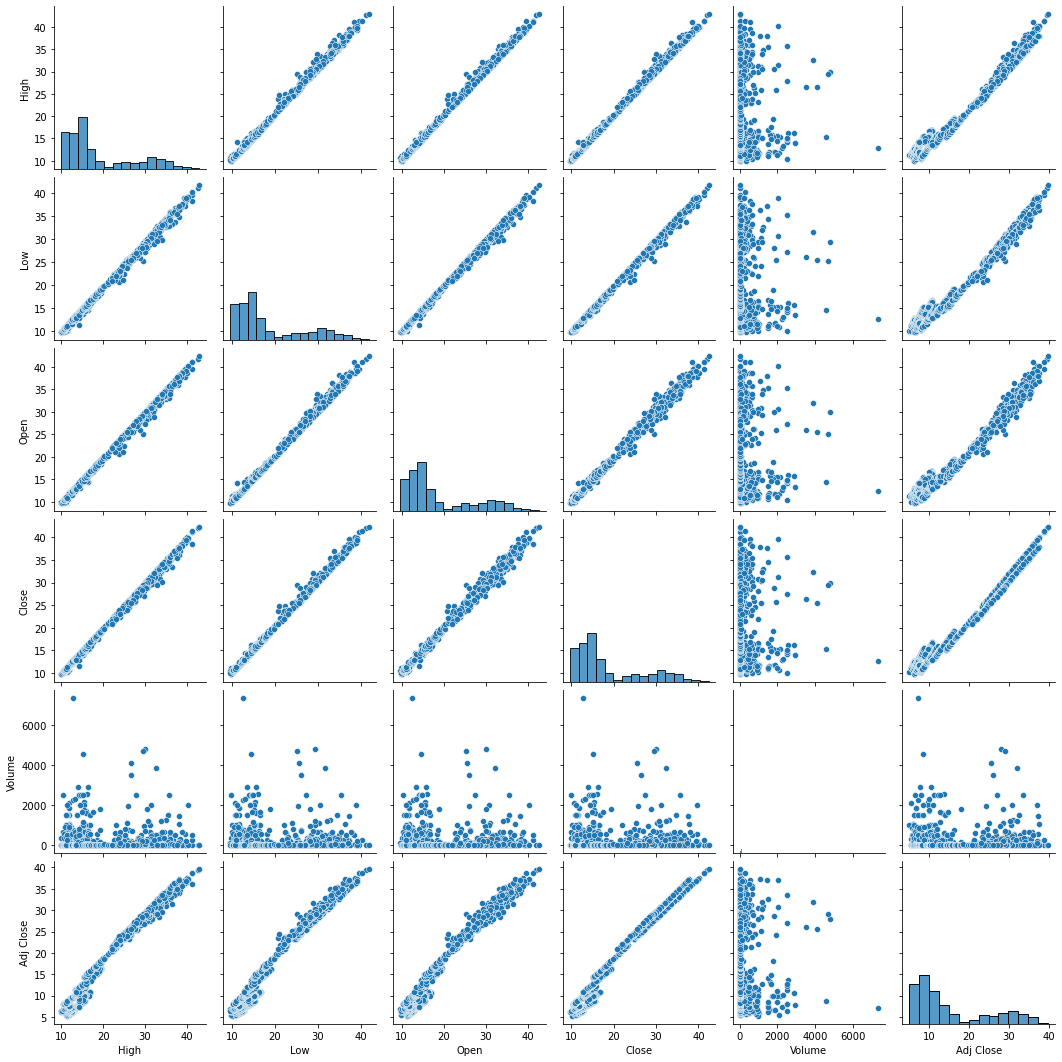

In [35]:
sns.pairplot(VWS)

<AxesSubplot:>

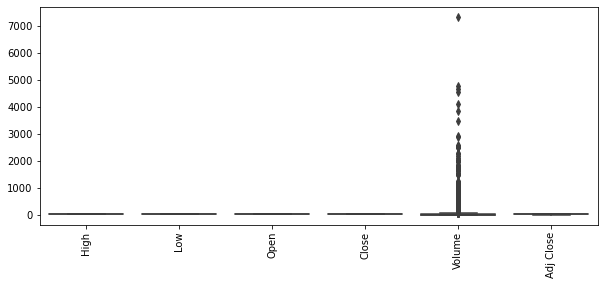

In [36]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=VWS)

In [37]:
# We selected the main column  for us
close_VWS= VWS['Close']

# freq='B' stands for only weekdays
weekdays_VWS= pd.date_range(start=start_date, end=end_date, freq='B')

 # We need to align the existing prices, so we reindex close using all weekdays as the new index.
close_VWS= close_VWS.reindex(weekdays_VWS)

#We filling the Missing values (NaN) with 'forward fill'
close_VWS = close_VWS.fillna(method='ffill')
#we passed the information into Dataframe and rename the columns
close_VWS= pd.DataFrame(close_VWS).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_VWS.tail()

Close
2022-05-03  23.549999
2022-05-04  23.840000
2022-05-05  23.125000
2022-05-06  22.070000
2022-05-09  20.799999

In [38]:
close_VWS.tail()

Close
2022-05-03  23.549999
2022-05-04  23.840000
2022-05-05  23.125000
2022-05-06  22.070000
2022-05-09  20.799999

In [39]:
close_VWS.describe()

Close
count  1656.000000
mean     18.619702
std       8.056035
min       9.700000
25%      12.413500
50%      15.193000
75%      24.747500
max      42.360001

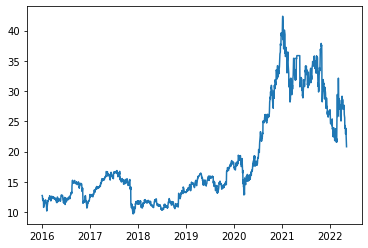

In [40]:
plt.plot(close_VWS["Close"],label='VWS Close Price history')

In [41]:
VWS_df = close_VWS

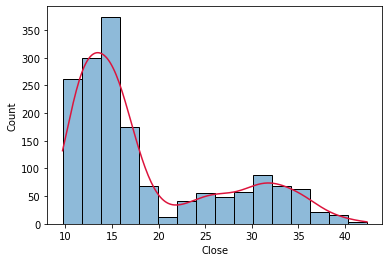

In [42]:
ax= sns.histplot(VWS_df['Close'], kde=True);
ax.lines[0].set_color('crimson')

In [43]:
VWS_df.to_csv("VWS_df.csv")

In [44]:
VWS_df= pd.read_csv('VWS_df.csv')#We decided works with a CSV for modeling 
VWS_df.head()

Unnamed: 0   Close
0  2016-01-04  12.738
1  2016-01-05  12.716
2  2016-01-06  12.592
3  2016-01-07  12.272
4  2016-01-08  12.000

In [45]:
#Renaming column Unnamed: 0
list(VWS_df.columns)

VWS_df = VWS_df.rename(columns={'Unnamed: 0': 'Date'})

In [46]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1656 non-null   object 
 1   Close   1656 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.0+ KB


In [47]:
VWS_df= VWS_df[['Date', 'Close']]
VWS_df

Date      Close
0     2016-01-04  12.738000
1     2016-01-05  12.716000
2     2016-01-06  12.592000
3     2016-01-07  12.272000
4     2016-01-08  12.000000
...          ...        ...
1651  2022-05-03  23.549999
1652  2022-05-04  23.840000
1653  2022-05-05  23.125000
1654  2022-05-06  22.070000
1655  2022-05-09  20.799999

[1656 rows x 2 columns]

In [48]:
#we define  the dataframe index value as the data column
VWS_df.index = VWS_df["Date"]

In [49]:
VWS_df= VWS_df.sort_index(ascending=True,axis=0)
df_2 = pd.DataFrame(index=range(0,len(VWS_df)),columns=['Date','Close'])
for i in range(0,len(df_2)):
    df_2["Date"][i]=VWS_df['Date'][i]
    df_2["Close"][i]=VWS_df["Close"][i]

VWS_df = df_2
#convert  the Date data to datatime Type
VWS_df["Date"] = pd.to_datetime(VWS_df.Date, format="%Y/%m/%d")
VWS_df.head()

Date   Close
0 2016-01-04  12.738
1 2016-01-05  12.716
2 2016-01-06  12.592
3 2016-01-07  12.272
4 2016-01-08    12.0

In [50]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1656 non-null   datetime64[ns]
 1   Close   1656 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 26.0+ KB


In [51]:
VWS_df = VWS_df.rename(columns={'Close': 'VWS'})
Stocks_df = VWS_df

In [52]:
Stocks_df

Date        VWS
0    2016-01-04     12.738
1    2016-01-05     12.716
2    2016-01-06     12.592
3    2016-01-07     12.272
4    2016-01-08       12.0
...         ...        ...
1651 2022-05-03  23.549999
1652 2022-05-04      23.84
1653 2022-05-05     23.125
1654 2022-05-06      22.07
1655 2022-05-09  20.799999

[1656 rows x 2 columns]

In [53]:
Stocks_df["EDPR"] = EDPR_df["Close"]

In [54]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1656 non-null   datetime64[ns]
 1   VWS     1656 non-null   object        
 2   EDPR    1656 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 38.9+ KB


In [55]:
Stocks_df

Date        VWS   EDPR
0    2016-01-04     12.738  3.244
1    2016-01-05     12.716  3.193
2    2016-01-06     12.592  3.156
3    2016-01-07     12.272   3.17
4    2016-01-08       12.0  3.209
...         ...        ...    ...
1651 2022-05-03  23.549999  4.354
1652 2022-05-04      23.84  4.378
1653 2022-05-05     23.125  4.406
1654 2022-05-06      22.07  4.242
1655 2022-05-09  20.799999  4.411

[1656 rows x 3 columns]

In [56]:
#we define  the dataframe'd index valu as the data column
Stocks_df.index = Stocks_df["Date"]

In [57]:
Stocks_df= Stocks_df.sort_index(ascending=True,axis=0)
df_3 = pd.DataFrame(index=range(0,len(Stocks_df)),columns=['Date','EDPR', 'VWS'])
for i in range(0,len(df_3)):
    df_3["Date"][i]=Stocks_df['Date'][i]
    df_3["EDPR"][i]=Stocks_df["EDPR"][i]
    df_3["VWS"][i]=Stocks_df["VWS"][i]

Stocks_df = df_3
#convert  the Date data to datatime Type
Stocks_df["Date"] = pd.to_datetime(Stocks_df.Date, format="%Y/%m/%d")
Stocks_df.tail()

Date   EDPR        VWS
1651 2022-05-03  4.354  23.549999
1652 2022-05-04  4.378      23.84
1653 2022-05-05  4.406     23.125
1654 2022-05-06  4.242      22.07
1655 2022-05-09  4.411  20.799999

In [58]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1656 non-null   datetime64[ns]
 1   EDPR    1656 non-null   object        
 2   VWS     1656 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 38.9+ KB


In [59]:
Stocks_df.tail()

Date   EDPR        VWS
1651 2022-05-03  4.354  23.549999
1652 2022-05-04  4.378      23.84
1653 2022-05-05  4.406     23.125
1654 2022-05-06  4.242      22.07
1655 2022-05-09  4.411  20.799999

In [60]:
import plotly.express as px
graphic = px.line(title = 'Stock price history')
for i in Stocks_df.columns[1:]:
  graphic.add_scatter(x = Stocks_df['Date'], y = Stocks_df[i], name = i)
graphic.show()

In [61]:
#Splinting into X/y
X = Stocks_df.drop('Date', axis=1)
y= Stocks_df['Date']
Stocks_normalized = X
Stocks_normalized.head()

EDPR     VWS
0  3.244  12.738
1  3.193  12.716
2  3.156  12.592
3   3.17  12.272
4  3.209    12.0

In [62]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(Stocks_normalized)
Stocks = scaler.transform(Stocks_normalized)
DF= pd.DataFrame(Stocks)
DF.rename(columns= {0: 'EDPR', 1: 'VWS'}, inplace=True)
X = DF
X['Date'] = y
X.set_index(X.columns[-1], inplace=True)
X.reset_index(inplace=True)
Stock_norm = X

In [63]:
Stock_norm.head()

Date      EDPR       VWS
0 2016-01-04  0.218200  0.093019
1 2016-01-05  0.201262  0.092345
2 2016-01-06  0.188974  0.088549
3 2016-01-07  0.193623  0.078751
4 2016-01-08  0.206576  0.070423

In [64]:
Stock_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1656 non-null   datetime64[ns]
 1   EDPR    1656 non-null   float64       
 2   VWS     1656 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.9 KB


In [65]:
#Visualizing the graphic with the normalized data

graphic_norm = px.line(title = 'Stock price history')
for i in Stock_norm.columns[1:]:
  graphic_norm.add_scatter(x = Stock_norm['Date'], y = Stock_norm[i], name = i)
graphic_norm.show()

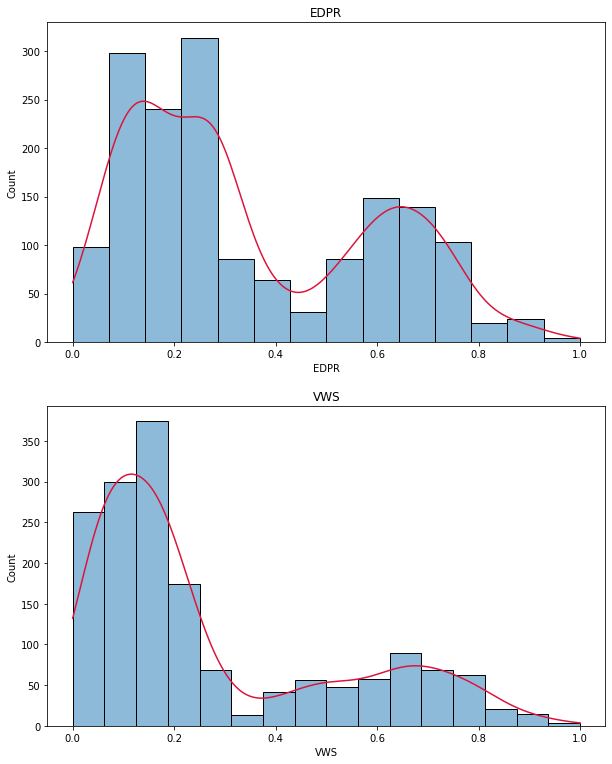

In [66]:
import numpy as np
plt.figure(figsize=(10,20))
i = 1
for i in np.arange(1, len(Stock_norm.columns)):
    plt.subplot(3, 1, i + 1)
    ax=sns.histplot(Stock_norm[Stock_norm.columns[i]], kde = True)
    ax.lines[0].set_color('crimson')
    plt.title(Stock_norm.columns[i])

### II.1- ETS-Decomposition


ETS-Decomposition is a method that allows us to visualize the data after a decomposition of time series into three distinct components: trend, seasonality, and noise.

* Additive decomposition: yt = St + Tt + Rt
* Multiplicative decomposition: yt = St * Tt * Rt

where, 
- S represents the Seasonal variation
- T encodes Trend plus Cycle
- R describes the Residual or the Error component.
Daitan (2019)

In [67]:
# graphs to show seasonal_decompose
def ETS_Decomposition (timeseries):
    decomposition = sm.tsa.seasonal_decompose(timeseries, model='mul',freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

#### A.- EDP Renováveis (EDPR.LS)

In [68]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
EDPR= pd.read_csv('EDPR.csv',index_col='Date',parse_dates=['Date'],date_parser=dateparse, dayfirst=True)
EDPR.head(2)

High    Low   Open  Close  Volume  Adj Close
Date                                                     
2016-01-04  3.244  3.244  3.244  3.244     0.0   2.110836
2016-01-05  3.193  3.193  3.193  3.193     0.0   2.077651

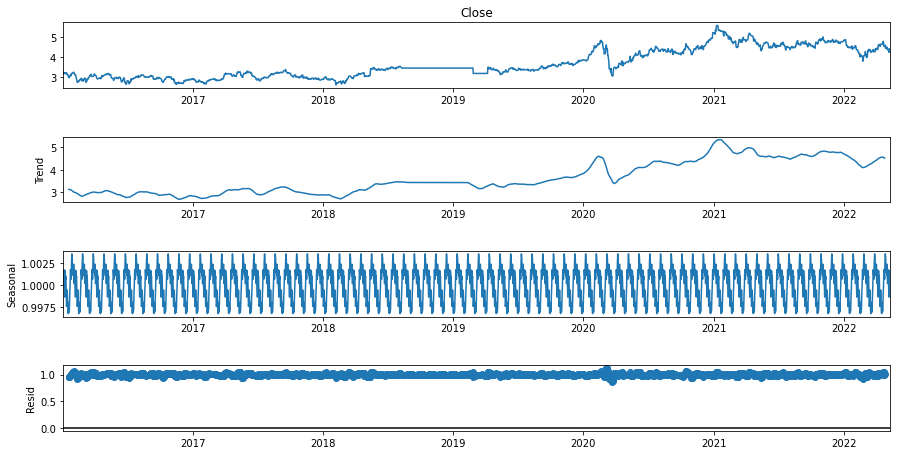

In [69]:
ETS_Decomposition (EDPR['Close'])

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [70]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
VWS= pd.read_csv('VWS.csv',index_col='Date', parse_dates=['Date'],date_parser=dateparse, dayfirst=True)
VWS.head(2)

High     Low    Open   Close  Volume  Adj Close
Date                                                         
2016-01-04  12.986  12.718  12.986  12.738   100.0   6.409401
2016-01-05  12.886  12.674  12.886  12.716     0.0   6.398331

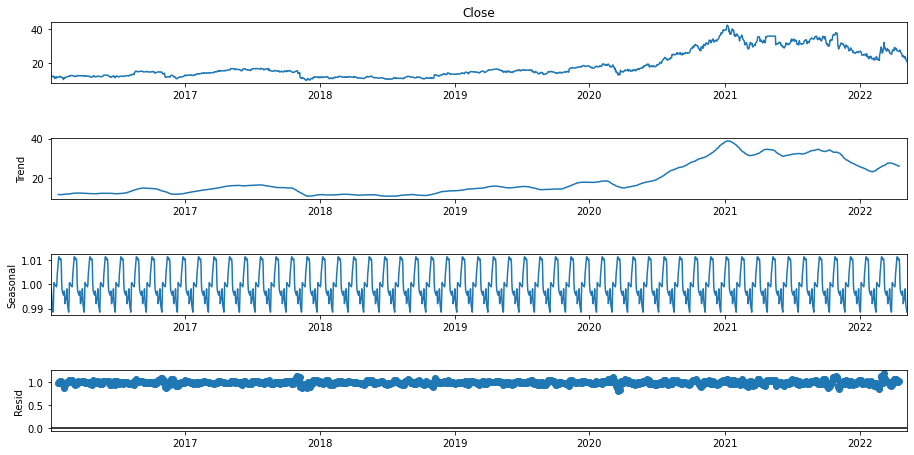

In [71]:
ETS_Decomposition (VWS['Close'])

### II.2.- Augmented Dickey–Fuller test

The Augmented Dickey-Fuller test helps us to detect if a time series is or not “stationary”. Stationary means that the data has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time. It is ‘stationarize’ the time series as part of the process of fitting a model.Zach (2021) 

In [72]:
def ADFuller(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(key, value, 'not' if value < result[0] else '', 100-int(key[:-1])))
        

In [73]:
### Plot for testing Stationarity with mean and standard deviation
def plot_stationarity(timeseries, title):
    
    #Determing rolling statistics
    mean = pd.Series(timeseries).rolling(30).mean()#rolling a month
    std = pd.Series(timeseries).rolling(30).std()#rolling a month
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(mean, label='rolling mean');
    ax.plot(std, label='rolling std');
    ax.legend()

#### A.- EDP Renováveis (EDPR.LS)

In [74]:
ADFuller(EDPR['Close'])

ADF Statistic: -1.539143
p-value: 0.514067
Critical Values:
	1%: -3.4331877074299406 - The data is not stationary with 99% confidence
	5%: -2.862793637974449 - The data is not stationary with 95% confidence
	10%: -2.5674373678364164 - The data is not stationary with 90% confidence


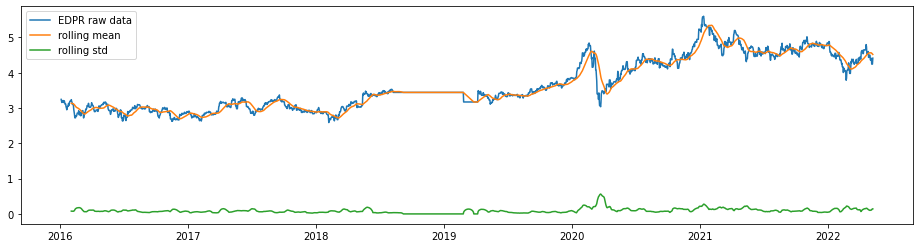

In [75]:
plot_stationarity(EDPR['Close'],'EDPR raw data')

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [76]:
ADFuller(VWS['Close'])

ADF Statistic: -1.391422
p-value: 0.586381
Critical Values:
	1%: -3.434358324786104 - The data is not stationary with 99% confidence
	5%: -2.8633104444209136 - The data is not stationary with 95% confidence
	10%: -2.5677125453453167 - The data is not stationary with 90% confidence


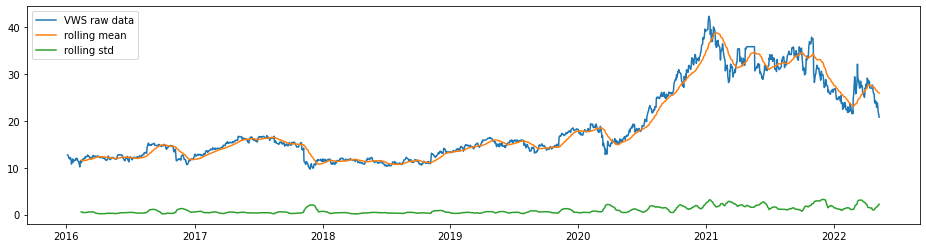

In [77]:
plot_stationarity(VWS['Close'],'VWS raw data')

### II.3.- Make the Data Stationary

### II.3.1.- Detrending: 

- Removing the underlying trend in the time series.

#### A.- EDP Renováveis (EDPR.LS)

ADF Statistic: -9.068383
p-value: 0.000000
Critical Values:
	1%: -3.4334827032362396 - The data is  stationary with 99% confidence
	5%: -2.862923892346305 - The data is  stationary with 95% confidence
	10%: -2.5675067196263823 - The data is  stationary with 90% confidence


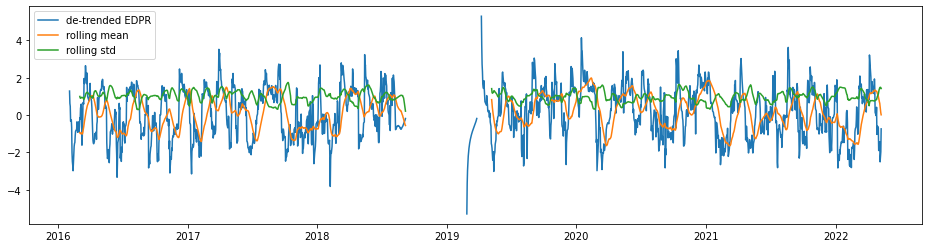

In [78]:
EDPR['Detrend']=  (EDPR['Close'] - EDPR['Close'].rolling(30).mean())/EDPR['Close'].rolling(30).std().dropna()
plot_stationarity(EDPR['Detrend'],'de-trended EDPR')
ADFuller(EDPR['Detrend'].dropna(inplace=False))

#### B.- Vestas Wind Systems A/S (VWS.CO)

ADF Statistic: -8.554778
p-value: 0.000000
Critical Values:
	1%: -3.434380559955255 - The data is  stationary with 99% confidence
	5%: -2.8633202588932547 - The data is  stationary with 95% confidence
	10%: -2.567717771455621 - The data is  stationary with 90% confidence


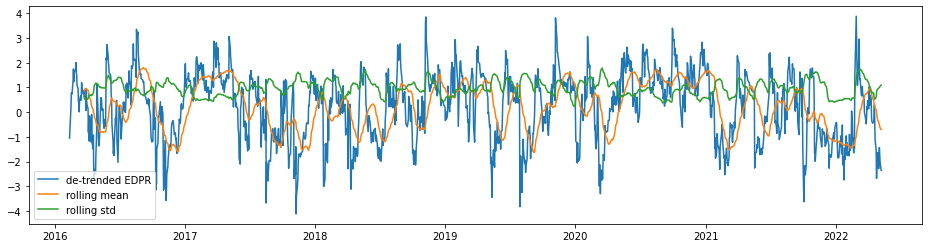

In [79]:
VWS['Detrend'] =  (VWS['Close'] - VWS['Close'].rolling(30).mean())/VWS['Close'].rolling(30).std().dropna()
plot_stationarity(VWS['Detrend'],'de-trended EDPR')
ADFuller(VWS['Detrend'].dropna(inplace=False))

### II.3.2.-  Differencing

#### A.- EDP Renováveis (EDPR.LS)

- Removing the underlying seasonal or cyclical patterns in the time series. 

In [80]:
EDPR['Differencing']=  EDPR['Close'] - EDPR['Close'].shift(1).dropna()

ADF Statistic: -15.182267
p-value: 0.000000
Critical Values:
	1%: -3.4331877074299406 - The data is  stationary with 99% confidence
	5%: -2.862793637974449 - The data is  stationary with 95% confidence
	10%: -2.5674373678364164 - The data is  stationary with 90% confidence


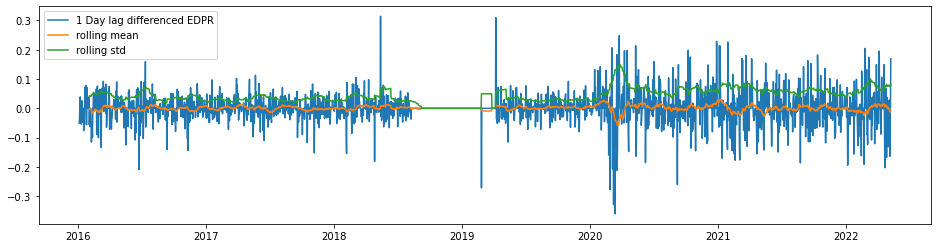

In [81]:
plot_stationarity(EDPR['Differencing'], '1 Day lag differenced EDPR')
ADFuller(EDPR['Differencing'].dropna(inplace=False))

#### B.- Vestas Wind Systems A/S (VWS.CO)

ADF Statistic: -8.544777
p-value: 0.000000
Critical Values:
	1%: -3.434358324786104 - The data is  stationary with 99% confidence
	5%: -2.8633104444209136 - The data is  stationary with 95% confidence
	10%: -2.5677125453453167 - The data is  stationary with 90% confidence


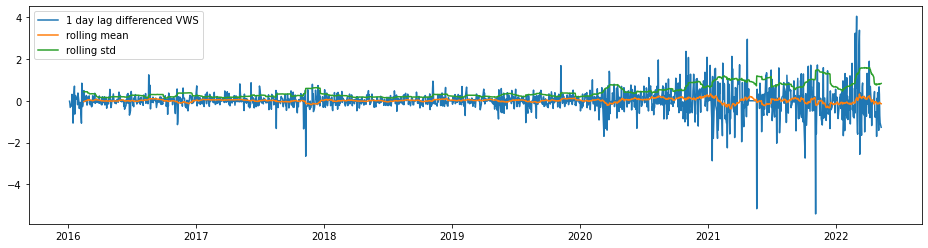

In [82]:
VWS['Differencing'] =  VWS['Close'] - VWS['Close'].shift(1).dropna()

plot_stationarity(VWS['Differencing'], '1 day lag differenced VWS')
ADFuller(VWS['Differencing'].dropna(inplace=False))

### II.3.3.-  Detrending + Differencing

- Removing the underlying trend and the seasonal or cyclical patterns in the time series.

#### A.- EDP Renováveis (EDPR.LS)

ADF Statistic: -13.222384
p-value: 0.000000
Critical Values:
	1%: -3.4334947554105537 - The data is  stationary with 99% confidence
	5%: -2.862929213668854 - The data is  stationary with 95% confidence
	10%: -2.567509552921939 - The data is  stationary with 90% confidence


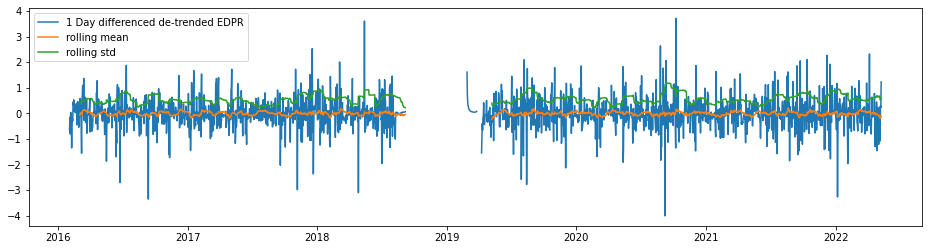

In [83]:
EDPR['Detrend_Diff']=  EDPR['Detrend']- EDPR['Detrend'].shift(1).dropna()
plot_stationarity(EDPR['Detrend_Diff'],'1 Day differenced de-trended EDPR')
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))

#### B.- Vestas Wind Systems A/S (VWS.CO)

ADF Statistic: -18.660842
p-value: 0.000000
Critical Values:
	1%: -3.434395520959224 - The data is  stationary with 99% confidence
	5%: -2.8633268625511046 - The data is  stationary with 95% confidence
	10%: -2.5677212878453477 - The data is  stationary with 90% confidence


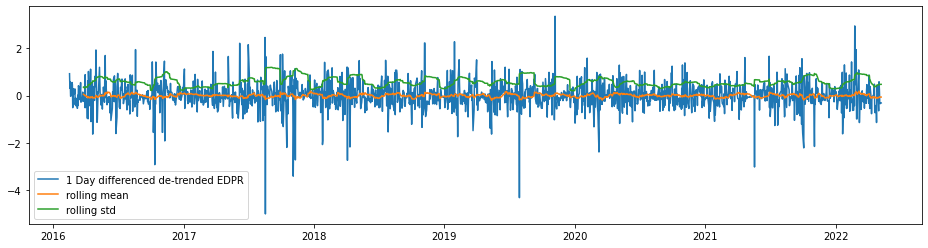

In [84]:
VWS['Detrend_Diff'] =  VWS['Detrend']- VWS['Detrend'].shift(1)

plot_stationarity(VWS['Detrend_Diff'],'1 Day differenced de-trended EDPR')
ADFuller(VWS['Detrend_Diff'].dropna(inplace=False))

### II.4- Identifying AR and MA orders by ACF and PACF plots

Plotting  ACF and PACF help us to undertand how to choose the best MA(q) and AR(p) values:

- ACF= Describes how well the present value of the series is related with its past values 
- PACF= It finds correlation of the residuals

Blue bars on the plots are the error bands, everything in this area is not statistically significant.  In linear regression models performs best when the predictors are not correlated and are independent of each other. 



In [85]:
# plot the data with 30 lags, one Month

### Plot for testing Stationarity with mean and standard deviation
def plot_ACF_PACF(timeseries, title):
    plt.figure(figsize=(12,8))
    layout = (2, 2)
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    timeseries.plot(ax = ax_xt)
    ax_xt.set_title(title)
    plot_acf(timeseries[1:], lags = 50, ax = ax_acf) # first value of diff is NaN
    plot_pacf(timeseries[1:], lags = 50, ax = ax_pacf) # first value of diff is NaN
    plt.tight_layout()

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight.

In [86]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
def plot_QQ(timeseries):
    x = sm.qqplot(timeseries, line= 's')

#### A.- EDP Renováveis (EDPR.LS)

ADF Statistic: -13.222384
p-value: 0.000000
Critical Values:
	1%: -3.4334947554105537 - The data is  stationary with 99% confidence
	5%: -2.862929213668854 - The data is  stationary with 95% confidence
	10%: -2.567509552921939 - The data is  stationary with 90% confidence


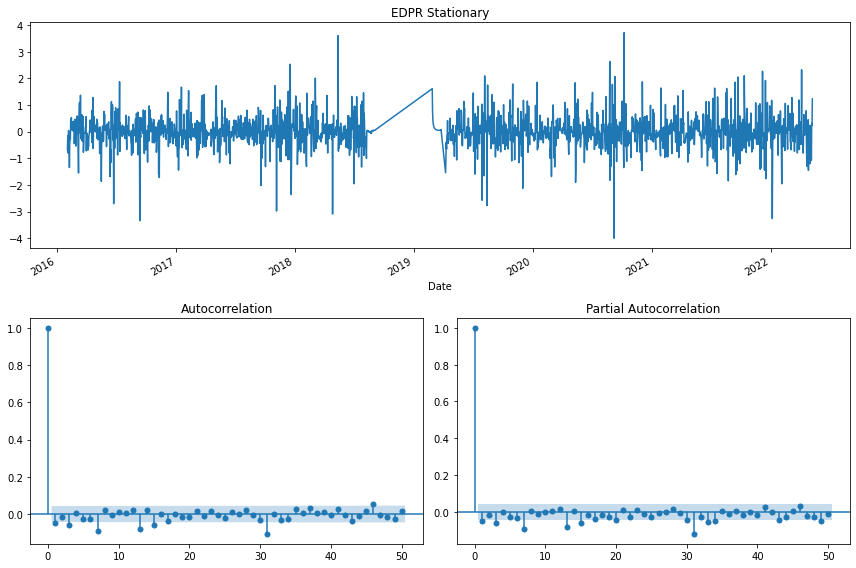

In [87]:
# Drop the first row of 'Close' column because It has 'NaN' value
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))
plot_ACF_PACF(EDPR['Detrend_Diff'].dropna(inplace=False) , 'EDPR Stationary')

It looks like the ACF is lagged by 7 and that PACF is geometric. If both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modelling.

<a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">Masum, M. (2020) </a>


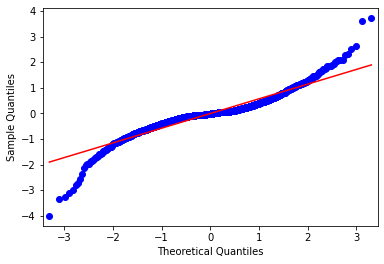

In [88]:
plot_QQ(EDPR['Detrend_Diff'].dropna())

#### B.- Vestas Wind Systems A/S (VWS.CO)

ADF Statistic: -13.222384
p-value: 0.000000
Critical Values:
	1%: -3.4334947554105537 - The data is  stationary with 99% confidence
	5%: -2.862929213668854 - The data is  stationary with 95% confidence
	10%: -2.567509552921939 - The data is  stationary with 90% confidence


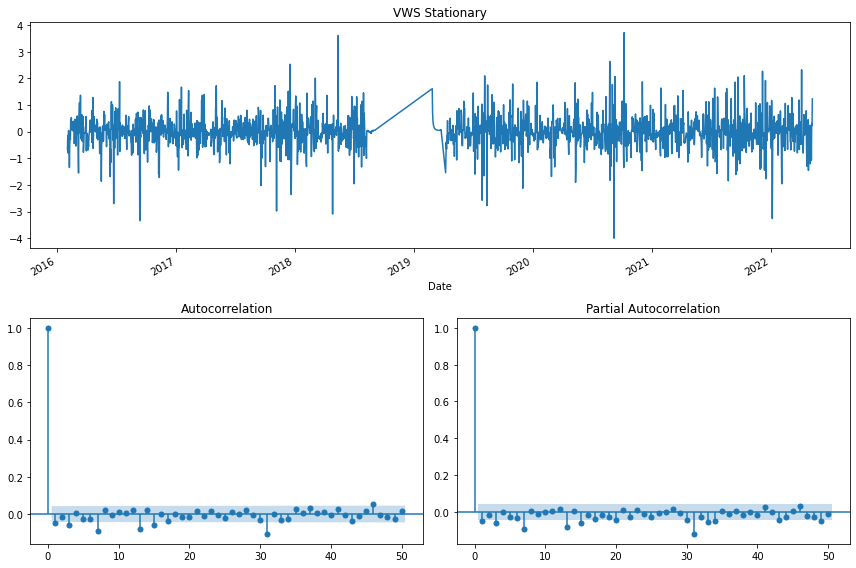

In [89]:
# Drop the first row of 'Close' column because It has 'NaN' value
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))
plot_ACF_PACF(EDPR['Detrend_Diff'].dropna(inplace=False) , 'VWS Stationary')

It looks like the ACF is lagged by 7 and that PACF is geometric. If both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modelling. 
<a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">Masum, M. (2020) </a>


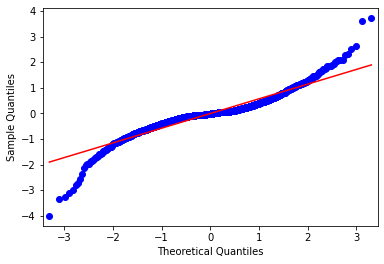

In [90]:
plot_QQ(EDPR['Detrend_Diff'].dropna(inplace=False))

### III.-Modelling

In [91]:
from sklearn.model_selection import TimeSeriesSplit

In [92]:
def plot_models(timeserie, model, title):
    f, axarr = plt.subplots(1, sharex = True)
    f.set_size_inches(12, 6)
    timeserie.iloc[1:].plot(color = 'b', linestyle = '-', ax = axarr)
    model.iloc[1:].plot(color = 'r', linestyle = '--', ax = axarr)
    axarr.set_title(title)
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Closing price')
    

In [93]:
#Specify fold and perform splitting
tscv = TimeSeriesSplit(n_splits=3)
tscv.split(EDPR)

#Find out no of observations in train and test sets
i=0
for train_A, test_A in tscv.split(EDPR):
    i=i+1
    print ("Shape EDPR train%s=%s" % (i, len(train_A)))
    print ("Shape EDPR test%s=%s" % (i, len(test_A)))

Shape EDPR train1=581
Shape EDPR test1=579
Shape EDPR train2=1160
Shape EDPR test2=579
Shape EDPR train3=1739
Shape EDPR test3=579


In [94]:
#Splitting according to the above description
trainA1, testA1 = EDPR.iloc[:500, 0], EDPR.iloc[500:890, 0]
trainA2, testA2 = EDPR.iloc[:890, 0], EDPR.iloc[890:1080, 0]
trainA3, testA3 = EDPR.iloc[:1080, 0], EDPR.iloc[1080:1240, 0]

In [95]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train_A = EDPR[:int(0.85 * (len(EDPR)))]
test_A  = EDPR[int(0.85 * (len(EDPR))):]
train_A.shape, test_A.shape

((1970, 9), (348, 9))

In [96]:
#Specify fold and perform splitting
tscv = TimeSeriesSplit(n_splits=3)
tscv.split(VWS)

#Find out no of observations in train and test sets
i=0
for train_B, test_B in tscv.split(VWS):
    i=i+1
    print ("No of observations under train%s=%s" % (i, len(train_B)))
    print ("No of observations under test%s=%s" % (i, len(test_B)))

No of observations under train1=414
No of observations under test1=414
No of observations under train2=828
No of observations under test2=414
No of observations under train3=1242
No of observations under test3=414


In [97]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train_B = VWS[:int(0.85 * (len(VWS)))]
test_B  = VWS[int(0.85 * (len(VWS))):]

train_B.shape, test_B.shape

((1407, 9), (249, 9))

In [98]:
EDPR_Results= pd.DataFrame()
VWS_Results=  pd.DataFrame()
Model= ['ARMA_Whole','ARMA_Split']

### III.1.- Moving Averages (MA)

-Process where the present value of series is defined as a linear combination of past errors.


In [99]:
w= 20

#### A.- EDP Renováveis (EDPR.LS)

In [100]:
#create moving average by applying a mean function to a rolling window.
EDPR['MA-RW'] = EDPR['Close'].rolling(window=w).mean()
#EDPR.head()

In [101]:
#create moving average by applying a mean function to a ewm (Exponentially Weighted Moving Average)
EDPR['MA_EWM'] = EDPR['Close'].ewm(span=w,adjust=False).mean()
#EDPR.head()

In [102]:
#create moving average by applying Simple Exponential Smoothing from statmodels Holt-Winters
warnings.filterwarnings('ignore') 
span = w
alpha = 2/(span+1)
EDPR['MA_SES']=SimpleExpSmoothing(EDPR['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues


##### Validating the Forecast

In [103]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1


#First fold RMSE
model1 = SimpleExpSmoothing(EDPR['Close']).fit()
pred1 = model1.predict(start=start , end=end)

In [104]:
# Create a dataframe to store r2 score
MA_SES_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], pred1)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_SES_EDPR['Model'] = 'MA_SES'
MA_SES_EDPR.set_index(['Model'], inplace=True)
MA_SES_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], pred1)
MA_SES_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], pred1)
MA_SES_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], pred1))
MA_SES_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(pred1 - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
MA_SES_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
MA_SES  0.914556             0.039704            0.003893   

        root_mean_squared_error  mean_absolute_percentage_error  
Model                                                            
MA_SES                 0.062396                        0.879747

In [105]:
#create moving average by applying Double Exponential Smoothing from statmodels Holt-Winters
EDPR['MA_Holt-Winters'] = ExponentialSmoothing(EDPR['Close'], trend='add').fit().fittedvalues



##### Validating the Forecast

In [106]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1


#First fold RMSE
model1 = ExponentialSmoothing(EDPR['Close'], seasonal='add',trend='add', seasonal_periods=12).fit()
pred1 = model1.predict(start=start , end=end)

In [107]:
# Create a dataframe to store r2 score
MA_HoltWinters_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], pred1)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_HoltWinters_EDPR['Model'] = 'MA_Holt-Winters'
MA_HoltWinters_EDPR.set_index(['Model'], inplace=True)
MA_HoltWinters_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], pred1)
MA_HoltWinters_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], pred1)
MA_HoltWinters_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], pred1))
MA_HoltWinters_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(pred1 - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
MA_HoltWinters_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_Holt-Winters   0.91449             0.040551            0.003896   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_Holt-Winters                  0.06242                        0.898401

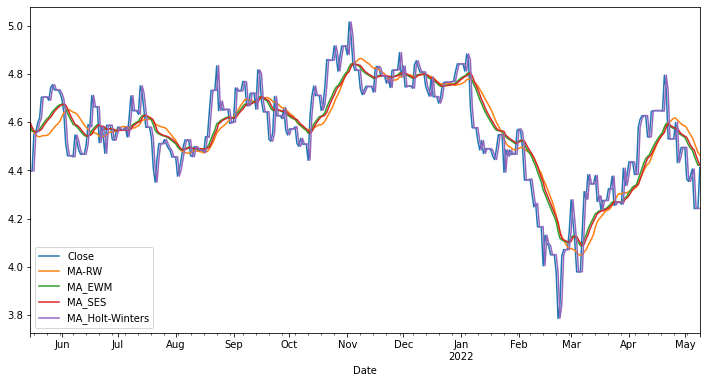

In [108]:
#Plotting the accuracy of the MA
EDPR[['Close','MA-RW','MA_EWM','MA_SES','MA_Holt-Winters']].iloc[-360:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [109]:
#create moving average by applying a mean function to a rolling window.
VWS['MA-RW'] = VWS['Close'].rolling(window=w).mean()
#VWS.head()

In [110]:
#create moving average by applying a mean function to a ewm (Exponentially Weighted Moving Average)
VWS['MA_EWM'] = VWS['Close'].ewm(span=w,adjust=False).mean()
#VWS.head()

In [111]:
warnings.filterwarnings('ignore') 
#create moving average by applying Simple Exponential Smoothing from statmodels Holt-Winters
span = w
alpha = 2/(span+1)
VWS.asfreq(freq='b')
VWS['MA_SES']=SimpleExpSmoothing(VWS['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues

##### Validating the Forecast

In [112]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1

model2 = ExponentialSmoothing(VWS['Close'], seasonal='mul',trend='add', seasonal_periods=12).fit()
pred2 = model2.predict(start=start , end=end)

In [113]:
# Create a dataframe to store r2 score
MA_SES_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], pred2)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_SES_VWS['Model'] = 'MA_SES'
MA_SES_VWS.set_index(['Model'], inplace=True)
MA_SES_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], pred2)
MA_SES_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], pred2)
MA_SES_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], pred2))
MA_SES_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(pred2 - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
MA_SES_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
MA_SES   0.94399             0.689059             0.92638   

        root_mean_squared_error  mean_absolute_percentage_error  
Model                                                            
MA_SES                 0.962487                         2.38855

In [114]:
#create moving average by applying Double Exponential Smoothing from statmodels Holt-Winters
VWS['MA_Holt-Winters'] = ExponentialSmoothing(VWS['Close'], trend='add').fit().fittedvalues

In [115]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1

model2 = ExponentialSmoothing(VWS['Close'], seasonal='mul',trend='add', seasonal_periods=12).fit()
pred2 = model2.predict(start=start , end=end)

In [116]:
# Create a dataframe to store r2 score
MA_HoltWinters_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], pred2)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_HoltWinters_VWS['Model'] = 'MA_Holt-Winters'
MA_HoltWinters_VWS.set_index(['Model'], inplace=True)
MA_HoltWinters_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], pred2)
MA_HoltWinters_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], pred2)
MA_HoltWinters_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], pred2))
MA_HoltWinters_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(pred2 - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
MA_HoltWinters_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_Holt-Winters   0.94399             0.689059             0.92638   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_Holt-Winters                 0.962487                         2.38855

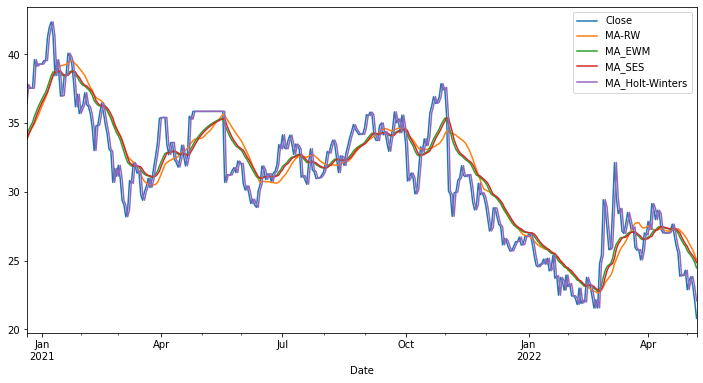

In [117]:
#Plotting the accuracy of the MA
VWS[['Close','MA-RW','MA_EWM','MA_SES','MA_Holt-Winters']].iloc[-360:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### III.2.- ARMA

#### A.- EDP Renováveis (EDPR.LS)

Month: 20 working days

In [118]:
arma_order_select_ic(EDPR['Close'])

{'bic':              0            1            2
 0  5055.093993  2126.398571  -226.645292
 1 -7300.790790 -7293.046992 -7285.741753
 2 -7293.047126 -7285.376831 -7294.970152
 3 -7285.773785 -7294.930645 -7287.762779
 4 -7278.452053 -7287.511822 -7280.021996,
 'bic_min_order': (1, 0)}

In [119]:
arma_EDPR = smtsa.ARMA(EDPR['Close'].tolist(), order=(1, 0)).fit(maxlag=20, method='mle', trend='nc') 


In [120]:
EDPR['ARMA']= arma_EDPR.predict()
arma_EDPR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2318
Model:                     ARMA(1, 0)   Log Likelihood                3658.840
Method:                           mle   S.D. of innovations              0.050
Date:                Tue, 10 May 2022   AIC                          -7313.679
Time:                        15:20:20   BIC                          -7302.183
Sample:                             0   HQIC                         -7309.489
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9999      0.000   9155.977      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

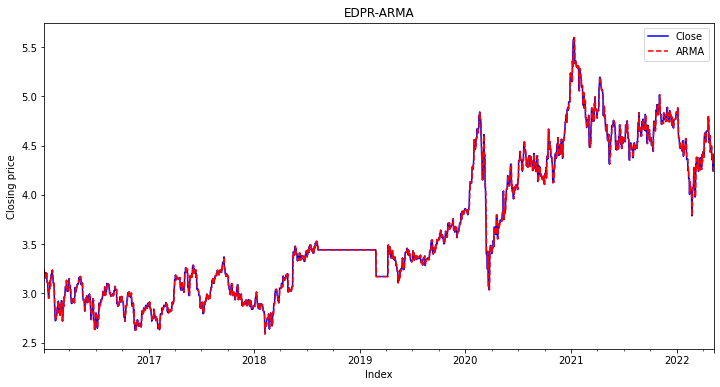

In [121]:
plot_models(EDPR['Close'], EDPR['ARMA'], 'EDPR-ARMA')

##### Validating the Forecast

In [122]:
#First fold
model1 = ExponentialSmoothing(trainA1, seasonal='mul', seasonal_periods=12).fit()
pred1 = model1.predict(start=testA1.index[0], end=testA1.index[-1])
RMSE1=round(sqrt(mean_squared_error(testA1, pred1)),2)

#First fold
model2 = ExponentialSmoothing(trainA2, seasonal='mul', seasonal_periods=12).fit()
pred2 = model2.predict(start=testA2.index[0], end=testA2.index[-1])
RMSE2=round(sqrt(mean_squared_error(testA2, pred2)),2)

#First fold
model3 = ExponentialSmoothing(trainA3, seasonal='mul', seasonal_periods=12).fit()
pred3 = model1.predict(start=testA3.index[0], end=testA3.index[-1])
RMSE3=round(sqrt(mean_squared_error(testA3, pred3)),2)

print ("RMSE1:", RMSE1)
print ("RMSE2:", RMSE2)
print ("RMSE3:", RMSE3)

Overall_RMSE=round((RMSE1+RMSE2+RMSE3)/3,2)
print ("Overall RMSE:", Overall_RMSE)

RMSE1: 0.18
RMSE2: 0.09
RMSE3: 0.28
Overall RMSE: 0.18


In [123]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1
predictions = arma_EDPR.predict(start = start, end = end, dynamic = False, typ = 'levels')

# Create a dataframe to store r2 score
R_arma_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arma_EDPR['Model'] = 'ARMA'
R_arma_EDPR.set_index(['Model'], inplace=True)
R_arma_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], predictions)
R_arma_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], predictions)
R_arma_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], predictions))
R_arma_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
R_arma_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARMA   0.914576             0.039799            0.003892   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARMA                  0.062388                        0.881795

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [124]:
VWS=VWS.dropna()

In [125]:
arma_order_select_ic(VWS['Close'])

{'bic':               0            1            2
 0  11420.143748  9340.306373  7736.002548
 1   2760.004603  2766.965069  2770.198525
 2   2766.927091  2774.446437  2774.448257
 3   2771.429554  2776.193003  2769.375528
 4   2765.499306  2765.647630  2771.312052,
 'bic_min_order': (1, 0)}

In [126]:
arma_VWS = smtsa.ARMA(VWS['Close'].tolist(), order=(1, 0)).fit(maxlag=20, method='mle', trend='nc') 


In [127]:
VWS['ARMA']= arma_VWS.predict()
arma_VWS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1626
Model:                     ARMA(1, 0)   Log Likelihood               -1370.809
Method:                           mle   S.D. of innovations              0.561
Date:                Tue, 10 May 2022   AIC                           2745.617
Time:                        15:20:26   BIC                           2756.405
Sample:                             0   HQIC                          2749.620
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9995      0.000   2117.218      0.000       0.999       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
-----------------------------------------------------------------------------
"""

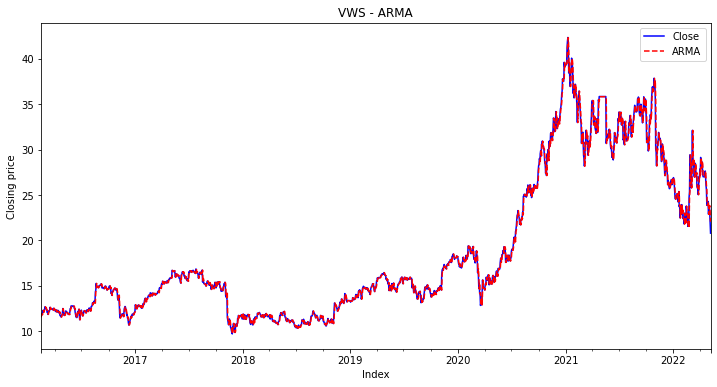

In [128]:
plot_models(VWS['Close'], VWS['ARMA'], 'VWS - ARMA')

##### Validating the Forecast

In [129]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1
predictions = arma_VWS.predict(start = start, end = end, dynamic = False, typ = 'levels')

In [130]:
# Create a dataframe to store r2 score
R_arma_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arma_VWS['Model'] = 'ARMA'
R_arma_VWS.set_index(['Model'], inplace=True)
R_arma_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], predictions)
R_arma_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], predictions)
R_arma_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], predictions))
R_arma_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
R_arma_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARMA   0.021052              3.40226           16.191507   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARMA                  4.023867                        11.87409

### III.3.- ARIMA

#### A.- EDP Renováveis (EDPR.LS)

In [131]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(EDPR['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)           

[[0, 1, 0, -7319.3576987527995], [0, 1, 1, -7317.357778240237], [0, 1, 2, -7315.7246868629845], [1, 1, 0, -7317.357780355194], [1, 1, 1, -7315.393200713093], [2, 1, 0, -7315.751858123911], [0, 2, 0, -5716.566146175815], [0, 2, 1, -7305.51989575731], [0, 2, 2, -7303.5216190428], [1, 2, 0, -6398.85570985396], [1, 2, 1, -7303.520612084078], [1, 2, 2, -7314.793557468163], [2, 2, 0, -6641.690269720704], [2, 2, 1, -7296.089270278466], [2, 2, 2, -7310.513502024425]]


In [132]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(EDPR['Close'].tolist(), order = (2, 0, 1))#best model by pmdarima.auto_arima
# Train the ARIMA model by calling a method fit()
arima_EDPR= arima_obj.fit(disp = 0)
# Display the summary of the trained model
arima_EDPR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2318
Model:                     ARMA(2, 1)   Log Likelihood                3662.060
Method:                       css-mle   S.D. of innovations              0.050
Date:                Tue, 10 May 2022   AIC                          -7314.119
Time:                        15:20:35   BIC                          -7285.377
Sample:                             0   HQIC                         -7303.644
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6889      0.353     10.436      0.000       2.996       4.382
ar.L1.y        1.4713      0.210      7.014      0.000       1.060       1.882
ar.L2.y       -0.4727      0.209     -2.259      0.024      -0.883      -0.063
ma.L1.y       -0.4685      0.211     -2.219      0.026      -0.882      -0.055
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0026           +0.0000j            1.0026            0.0000
AR.2            2.1103           +0.0000j            2.1103            0.0000
MA.1            2.1342           +0.0000j            2.1342            0.0000
-----------------------------------------------------------------------------
"""

In [133]:
# Declare the array 'pred' and append the values 
pred = arima_EDPR.fittedvalues.tolist()

In [134]:
# Add a new column 'ARIMA' into dataframe
EDPR['ARIMA'] = pred

In [135]:
# Residues and fitted values are added and stored into dataframe
diffval = arima_EDPR.resid + arima_EDPR.fittedvalues

In [136]:
EDPR['diffval']= diffval

In [137]:
# Display first five records
EDPR.tail()

High    Low   Open  Close  Volume  Adj Close   Detrend  \
Date                                                                  
2022-05-05  4.406  4.406  4.406  4.406   685.0      4.406 -1.428934   
2022-05-06  4.242  4.242  4.242  4.242     0.0      4.242 -2.506036   
2022-05-07  4.242  4.242  4.242  4.242     0.0      4.242 -2.198566   
2022-05-08  4.242  4.242  4.242  4.242     0.0      4.242 -1.968131   
2022-05-09  4.411  4.411  4.411  4.411     0.0      4.411 -0.737752   

            Differencing  Detrend_Diff    MA-RW    MA_EWM    MA_SES  \
Date                                                                  
2022-05-05         0.028      0.234705  4.53595  4.484650  4.492929   
2022-05-06        -0.164     -1.077102  4.51565  4.461540  4.484650   
2022-05-07         0.000      0.307470  4.49535  4.440632  4.461540   
2022-05-08         0.000      0.230435  4.47505  4.421714  4.440632   
2022-05-09         0.169      1.230379  4.46330  4.420694  4.421714   

            MA_Holt-Winters      ARMA     ARIMA  diffval  
Date                                                      
2022-05-05         4.378503  4.377632  4.376206    4.406  
2022-05-06         4.406504  4.405630  4.404308    4.242  
2022-05-07         4.242504  4.241644  4.239790    4.242  
2022-05-08         4.242504  4.241644  4.240219    4.242  
2022-05-09         4.242504  4.241644  4.240421    4.411

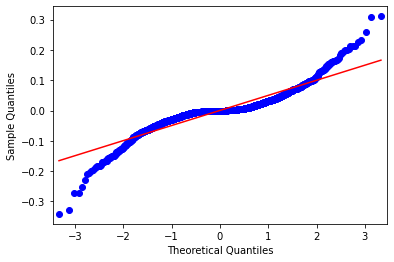

In [138]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_obj_fit.resid, line = 's')

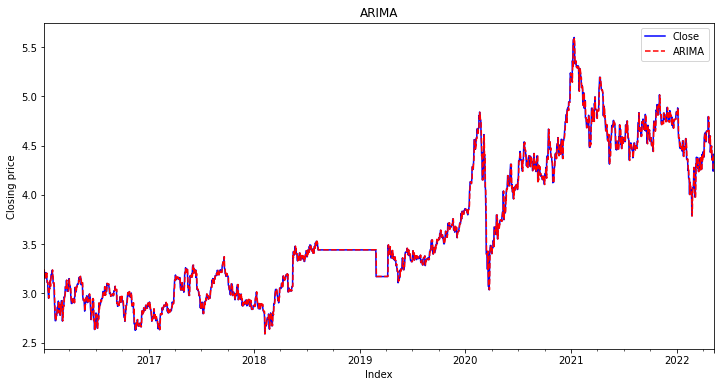

In [139]:
plot_models(EDPR['Close'], EDPR['ARIMA'], 'ARIMA')

Text(0, 0.5, 'Closing')

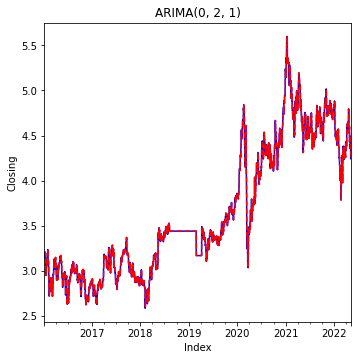

In [140]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
EDPR['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
EDPR['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(0, 2, 1)')
plt.xlabel('Index')
plt.ylabel('Closing')

Text(0, 0.5, 'Forecasted value')

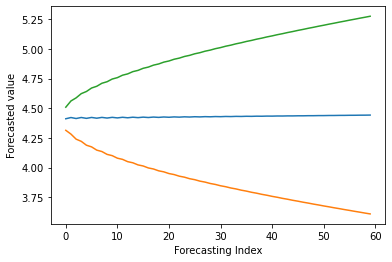

In [141]:
f, err, ci = arima_obj_fit.forecast(60)
plt.plot(f)
plt.plot(ci)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value')
# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure

##### Validating the Forecast

In [142]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1
predictions = arima_EDPR.predict(start = start, end = end, dynamic = False, typ = 'levels')

In [143]:
# Create a dataframe to store r2 score
R_arima_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arima_EDPR ['Model'] = 'ARIMA'
R_arima_EDPR .set_index(['Model'], inplace=True)
R_arima_EDPR ['mean_absolute_error'] = mean_absolute_error(test_A['Close'], predictions)
R_arima_EDPR ['mean_squared_error'] = mean_squared_error(test_A['Close'], predictions)
R_arima_EDPR ['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], predictions))
R_arima_EDPR ['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
R_arima_EDPR 

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARIMA  0.914663             0.040271            0.003888   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARIMA                 0.062357                        0.891876

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [144]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(VWS['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)    
       

[[0, 1, 0, 2737.242174305773], [0, 1, 1, 2738.872616687187], [0, 1, 2, 2736.9984363539106], [1, 1, 0, 2738.8414373862433], [1, 1, 1, 2740.63727864142], [1, 1, 2, 2735.823247212202], [2, 1, 0, 2738.141291666501], [2, 1, 1, 2737.506832640909], [2, 1, 2, 2725.1513941647263], [0, 2, 0, 3833.9118818931497], [0, 2, 1, 2745.796966924127], [0, 2, 2, 2747.4016779085664], [1, 2, 0, 3339.39522619584], [1, 2, 1, 2747.367859771689], [1, 2, 2, 2747.002544595292], [2, 2, 0, 3237.292902669276], [2, 2, 1, 2746.8387976931126], [2, 2, 2, 2745.9578768505094]]


In [145]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(VWS['Close'].tolist(), order = (2, 1, 2))#best model by pmdarima.auto_arima
# Train the ARIMA model by calling a method fit()
arima_VWS= arima_obj.fit(disp = 0)
# Display the summary of the trained model
arima_VWS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1625
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1356.576
Method:                       css-mle   S.D. of innovations              0.558
Date:                Tue, 10 May 2022   AIC                           2725.151
Time:                        15:20:45   BIC                           2757.511
Sample:                             1   HQIC                          2737.158
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.014      0.400      0.689      -0.022       0.034
ar.L1.D.y     -0.8468      0.130     -6.530      0.000      -1.101      -0.593
ar.L2.D.y     -0.6817      0.091     -7.472      0.000      -0.861      -0.503
ma.L1.D.y      0.8571      0.115      7.436      0.000       0.631       1.083
ma.L2.D.y      0.7569      0.080      9.479      0.000       0.600       0.913
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6211           -1.0398j            1.2111           -0.3357
AR.2           -0.6211           +1.0398j            1.2111            0.3357
MA.1           -0.5662           -1.0003j            1.1494           -0.3320
MA.2           -0.5662           +1.0003j            1.1494            0.3320
-----------------------------------------------------------------------------
"""

In [146]:
# Declare the array 'pred' and append the values 
pred = np.append([0], arima_VWS.fittedvalues.tolist())

In [147]:
# Add a new column 'ARIMA' into dataframe
VWS['ARIMA'] = pred 

In [148]:
# Residues and fitted values are added and stored into dataframe
diffval = np.append([0],arima_VWS.resid + arima_VWS.fittedvalues)

In [149]:
# Add a column 'diffval' into dataframe
VWS['diffval'] = diffval

In [150]:
# Display first five records
VWS.tail()

High        Low       Open      Close  Volume  Adj Close  \
Date                                                                        
2022-05-03  23.549999  22.905001  22.905001  23.549999   300.0  23.549999   
2022-05-04  23.844999  23.360001  23.510000  23.840000     0.0  23.840000   
2022-05-05  24.045000  23.070000  23.940001  23.125000   132.0  23.125000   
2022-05-06  23.150000  22.035000  23.150000  22.070000  1000.0  22.070000   
2022-05-09  22.049999  20.799999  22.049999  20.799999    28.0  20.799999   

             Detrend  Differencing  Detrend_Diff     MA-RW     MA_EWM  \
Date                                                                    
2022-05-03 -1.700062      0.664999      0.584677  26.25475  25.529466   
2022-05-04 -1.430316      0.290001      0.269746  26.00750  25.368565   
2022-05-05 -1.701232     -0.715000     -0.270916  25.76475  25.154892   
2022-05-06 -2.043048     -1.055000     -0.341816  25.43500  24.861092   
2022-05-09 -2.354258     -1.270000     -0.311210  25.05325  24.474322   

               MA_SES  MA_Holt-Winters       ARMA     ARIMA   diffval  
Date                                                                   
2022-05-03  25.737831        22.889870  22.874416 -0.041306  0.664999  
2022-05-04  25.529466        23.554869  23.539107 -0.033966  0.290001  
2022-05-05  25.368565        23.844870  23.828974  0.127775 -0.715000  
2022-05-06  25.154892        23.129870  23.114305 -0.054966 -1.055000  
2022-05-09  24.861092        22.074870  22.059792 -0.099758 -1.270000

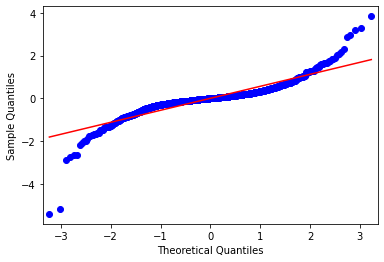

In [151]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_obj_fit.resid, line = 's')

Text(0, 0.5, 'Closing')

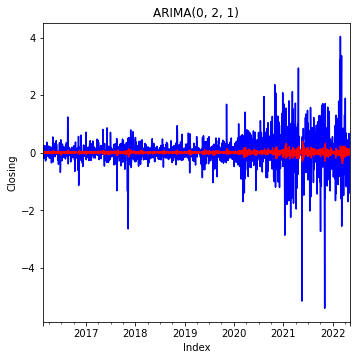

In [152]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
VWS['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
VWS['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(0, 2, 1)')
plt.xlabel('Index')
plt.ylabel('Closing')

Text(0, 0.5, 'Forecasted value')

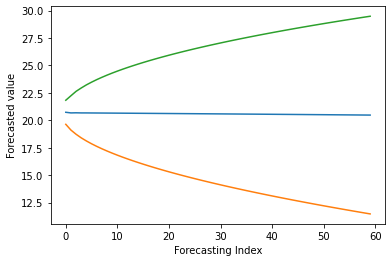

In [153]:
f, err, ci = arima_obj_fit.forecast(60)
plt.plot(f)
plt.plot(ci)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value')
# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure

##### Validating the Forecast

In [154]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1
predictions = arima_VWS.predict(start = start, end = end, dynamic = False, typ = 'levels')

In [155]:
# Create a dataframe to store r2 score
R_arima_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arima_VWS['Model'] = 'ARIMA'
R_arima_VWS.set_index(['Model'], inplace=True)
R_arima_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], predictions)
R_arima_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], predictions)
R_arima_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], predictions))
R_arima_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
R_arima_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARIMA  0.034591              3.37892           15.967569   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARIMA                 3.995944                        11.77872

### III.4.-SARIMA

#### A.- EDP Renováveis (EDPR.LS) 

In [156]:
# order = (2, 1, 2) means 
# First 2 for auto regressive model, 1 for difference, and second 2 for moving average
# seasonal_order = (2, 1, 2, 12) means
# 12 additional parameter means number of observations per year or the period
SARIMAX_EDPR = SARIMAX(EDPR['Close'], order = (2, 1, 2), seasonal_order = (2, 1, 2, 12)).fit(dis = -1)

# Display the summary of the model
print(SARIMAX_EDPR.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2318
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                3609.988
Date:                            Tue, 10 May 2022   AIC                          -7201.976
Time:                                    15:21:18   BIC                          -7150.291
Sample:                                01-04-2016   HQIC                         -7183.135
                                     - 05-09-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0272      1.232      0.022      0.982      -2.387       2.442
ar.L2         -0.4548      1.255   

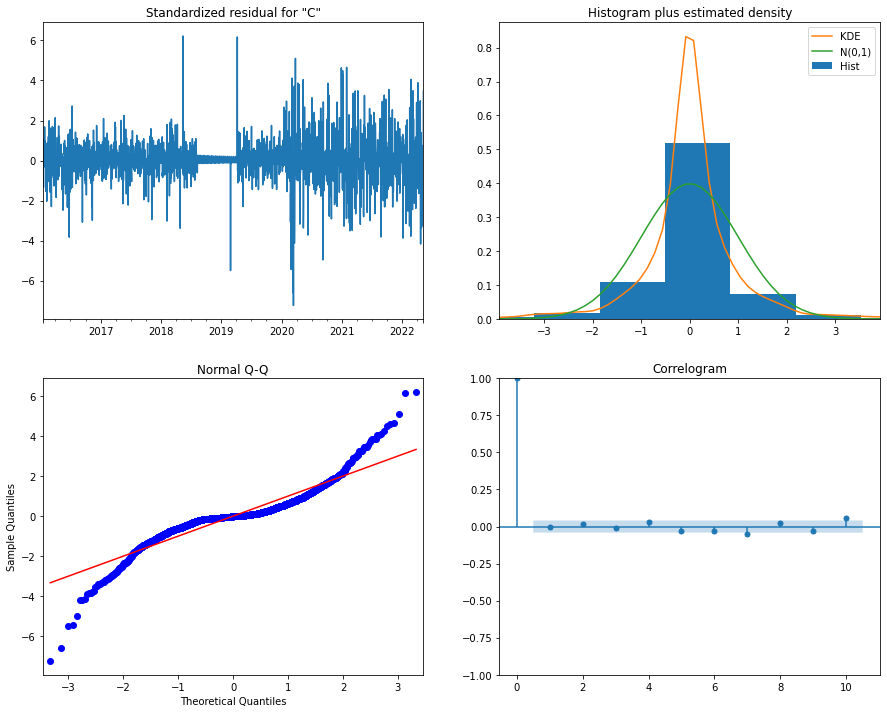

In [157]:
# Diagnosing the model residuals
SARIMAX_EDPR.plot_diagnostics(figsize = (15, 12))
plt.show()

##### Validating the Forecast

In [158]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1
predictions = SARIMAX_EDPR.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

2021-05-27    4.742461
2021-05-28    4.757690
2021-05-29    4.732799
2021-05-30    4.740918
2021-05-31    4.738721
                ...   
2022-05-05    4.373158
2022-05-06    4.405359
2022-05-07    4.245541
2022-05-08    4.245470
2022-05-09    4.237740
Freq: D, Name: SARIMA Predictions, Length: 348, dtype: float64


In [159]:
# Create a dataframe to store r2 score
R_SARIMAX_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_SARIMAX_EDPR['Model'] = 'SARIMA'
R_SARIMAX_EDPR.set_index(['Model'], inplace=True)
R_SARIMAX_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], predictions)
R_SARIMAX_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], predictions)
R_SARIMAX_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], predictions))
R_SARIMAX_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
R_SARIMAX_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
SARIMA  0.913729             0.041025            0.003931   

        root_mean_squared_error  mean_absolute_percentage_error  
Model                                                            
SARIMA                 0.062697                        0.909117

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [160]:
# order = (2, 1, 2) means 
# First 2 for auto regressive model, 1 for difference, and second 2 for moving average
# seasonal_order = (2, 1, 2, 12) means
# 12 additional parameter means number of observations per year or the period
SARIMAX_VWS = SARIMAX(VWS['Close'], order = (2, 1, 2), seasonal_order = (2, 1, 2, 12)).fit(dis = -1)

# Display the summary of the model
print(SARIMAX_VWS.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1626
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1374.403
Date:                            Tue, 10 May 2022   AIC                           2766.807
Time:                                    15:21:54   BIC                           2815.279
Sample:                                02-15-2016   HQIC                          2784.799
                                     - 05-09-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7035      0.099     -7.111      0.000      -0.897      -0.510
ar.L2         -0.5730      0.101   

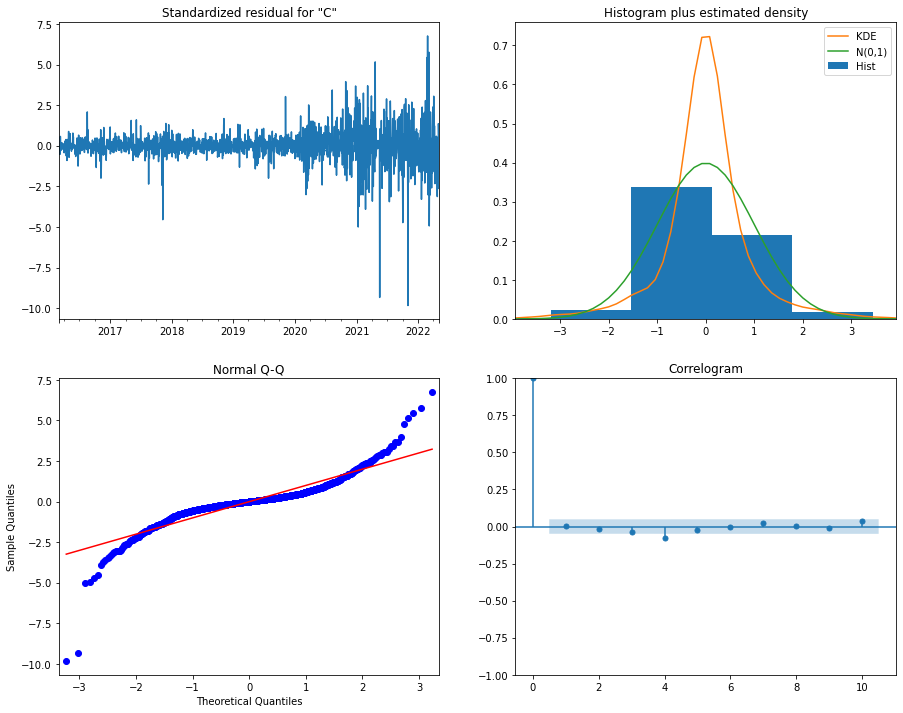

In [161]:
# Diagnosing the model residuals
SARIMAX_VWS.plot_diagnostics(figsize = (15, 12))
plt.show()

##### Validating the Forecast

In [162]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1
predictions = SARIMAX_VWS.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

2021-07-07    33.760825
2021-07-08    34.121363
2021-07-09    33.481387
2021-07-12    32.617162
2021-07-13    33.507940
                ...    
2022-06-14    21.409721
2022-06-15    21.320698
2022-06-16    21.301400
2022-06-17    21.300192
2022-06-20    21.340178
Freq: B, Name: SARIMA Predictions, Length: 249, dtype: float64


https://stackoverflow.com/questions/38361526/fill-the-missing-date-values-in-a-pandas-dataframe-column

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

In [163]:
# Create a dataframe to store r2 score
R_SARIMAX_VWS= pd.DataFrame({'r2_score': r2_score(test_B['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_SARIMAX_VWS['Model'] = 'SARIMA'
R_SARIMAX_VWS.set_index(['Model'], inplace=True)
R_SARIMAX_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], predictions)
R_SARIMAX_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], predictions)
R_SARIMAX_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], predictions))
R_SARIMAX_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
R_SARIMAX_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
SARIMA  0.065783             3.326534           15.451662   

        root_mean_squared_error  mean_absolute_percentage_error  
Model                                                            
SARIMA                  3.93086                         2.48437

### III.5.-Keras

#### A.- EDP Renováveis (EDPR.LS) 

In [164]:
 """model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(train_A.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(train_A,train_A,epochs=100,batch_size=32)"""

"model = Sequential()\nmodel.add(LSTM(units=50,return_sequences=True,input_shape=(train_A.shape[1], 1)))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(units=50,return_sequences=True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(units=50,return_sequences=True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(units=50))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(units=1))\nmodel.compile(optimizer='adam',loss='mean_squared_error')\nmodel.fit(train_A,train_A,epochs=100,batch_size=32)"

In [165]:
"""total = pd.concat((train_A['Close'], test_A['Close']), axis = 0)
inputs = total[len(total) - len(test_A) - 60:].values
inputs = inputs.reshape(-1,1)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)"""

"total = pd.concat((train_A['Close'], test_A['Close']), axis = 0)\ninputs = total[len(total) - len(test_A) - 60:].values\ninputs = inputs.reshape(-1,1)\nX_test = []\nfor i in range(60, 76):\n    X_test.append(inputs[i-60:i, 0])\n    X_test = np.array(X_test)\n    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))\n    predicted_stock_price = model.predict(X_test)\n    predicted_stock_price = sc.inverse_transform(predicted_stock_price)"

https://www.thepythoncode.com/article/stock-price-prediction-in-python-using-tensorflow-2-and-keras

#### B.- Vestas Wind Systems A/S (VWS.CO)

### III.6.-Facebook Prophet

#### A.- EDP Renováveis (EDPR.LS) 

In [166]:
dataset_EDP = pd.read_csv('EDPR_df.csv')

In [167]:
dataset_EDP = dataset_EDP[['Unnamed: 0', 'Close']].rename(columns = {'Unnamed: 0': 'ds', 'Close': 'y'})
dataset_EDP.head()

ds      y
0  2016-01-04  3.244
1  2016-01-05  3.193
2  2016-01-06  3.156
3  2016-01-07  3.170
4  2016-01-08  3.209

In [168]:
model = Prophet(daily_seasonality=True)
model.fit(dataset_EDP)

In [169]:
future_EDP = model.make_future_dataframe(periods=90) # With this line of code the model will make predictions for the next 90 days
preds_EDP = model.predict(future_EDP)

In [170]:
preds_EDP.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2016-01-04  3.194420    2.934899    3.384841     3.194420     3.194420   
1 2016-01-05  3.193865    2.935290    3.401219     3.193865     3.193865   
2 2016-01-06  3.193311    2.912611    3.382567     3.193311     3.193311   
3 2016-01-07  3.192756    2.935994    3.398311     3.192756     3.192756   
4 2016-01-08  3.192202    2.937532    3.401509     3.192202     3.192202   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  ...  \
0       -0.039907             -0.039907             -0.039907 -0.154791  ...   
1       -0.036315             -0.036315             -0.036315 -0.154791  ...   
2       -0.039499             -0.039499             -0.039499 -0.154791  ...   
3       -0.036022             -0.036022             -0.036022 -0.154791  ...   
4       -0.038219             -0.038219             -0.038219 -0.154791  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0 -0.010739     -0.010739     -0.010739  0.125622      0.125622      0.125622   
1 -0.006941     -0.006941     -0.006941  0.125416      0.125416      0.125416   
2 -0.009555     -0.009555     -0.009555  0.124846      0.124846      0.124846   
3 -0.005199     -0.005199     -0.005199  0.123968      0.123968      0.123968   
4 -0.006264     -0.006264     -0.006264  0.122836      0.122836      0.122836   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  3.154512  
1                         0.0  3.157550  
2                         0.0  3.153812  
3                         0.0  3.156735  
4                         0.0  3.153983  

[5 rows x 22 columns]

In [171]:
preds_EDP.tail(90)

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1656 2022-05-10  4.557816    4.093636    4.544728     4.557816     4.557816   
1657 2022-05-11  4.556768    4.073279    4.551996     4.556768     4.556768   
1658 2022-05-12  4.555720    4.088709    4.552156     4.555720     4.555720   
1659 2022-05-13  4.554672    4.096836    4.567995     4.554672     4.554672   
1660 2022-05-14  4.553624    4.137366    4.590484     4.553624     4.553624   
...         ...       ...         ...         ...          ...          ...   
1741 2022-08-03  4.468735    4.071029    4.547411     4.421869     4.516272   
1742 2022-08-04  4.467687    4.077167    4.563697     4.420078     4.516515   
1743 2022-08-05  4.466639    4.078104    4.564290     4.418055     4.516822   
1744 2022-08-06  4.465591    4.094671    4.587386     4.416161     4.517096   
1745 2022-08-07  4.464543    4.082584    4.585148     4.414072     4.517306   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
1656       -0.242733             -0.242733             -0.242733 -0.154791   
1657       -0.243626             -0.243626             -0.243626 -0.154791   
1658       -0.236345             -0.236345             -0.236345 -0.154791   
1659       -0.233352             -0.233352             -0.233352 -0.154791   
1660       -0.202638             -0.202638             -0.202638 -0.154791   
...              ...                   ...                   ...       ...   
1741       -0.155765             -0.155765             -0.155765 -0.154791   
1742       -0.151173             -0.151173             -0.151173 -0.154791   
1743       -0.152027             -0.152027             -0.152027 -0.154791   
1744       -0.126210             -0.126210             -0.126210 -0.154791   
1745       -0.125994             -0.125994             -0.125994 -0.154791   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
1656  ... -0.006941     -0.006941     -0.006941 -0.081002     -0.081002   
1657  ... -0.009555     -0.009555     -0.009555 -0.079281     -0.079281   
1658  ... -0.005199     -0.005199     -0.005199 -0.076356     -0.076356   
1659  ... -0.006264     -0.006264     -0.006264 -0.072297     -0.072297   
1660  ...  0.019349      0.019349      0.019349 -0.067196     -0.067196   
...   ...       ...           ...           ...       ...           ...   
1741  ... -0.009555     -0.009555     -0.009555  0.008580      0.008580   
1742  ... -0.005199     -0.005199     -0.005199  0.008816      0.008816   
1743  ... -0.006264     -0.006264     -0.006264  0.009028      0.009028   
1744  ...  0.019349      0.019349      0.019349  0.009232      0.009232   
1745  ...  0.019349      0.019349      0.019349  0.009448      0.009448   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1656     -0.081002                   0.0                         0.0   
1657     -0.079281                   0.0                         0.0   
1658     -0.076356                   0.0                         0.0   
1659     -0.072297                   0.0                         0.0   
1660     -0.067196                   0.0                         0.0   
...            ...                   ...                         ...   
1741      0.008580                   0.0                         0.0   
1742      0.008816                   0.0                         0.0   
1743      0.009028                   0.0                         0.0   
1744      0.009232                   0.0                         0.0   
1745      0.009448                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
1656                         0.0  4.315083  
1657                         0.0  4.313141  
1658                         0.0  4.319374  
1659                         0.0  4.321320  
1660                         0.0  4.350986  
...                          ...       ...  
1741                         0.0  4.312970  
1

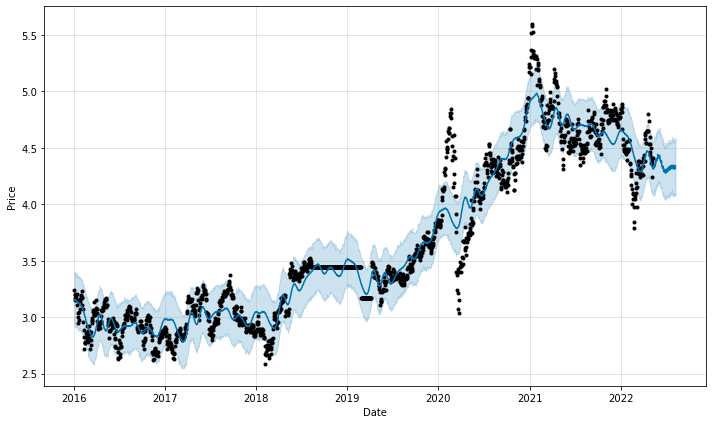

In [172]:
model.plot(preds_EDP, xlabel = 'Date', ylabel = 'Price');

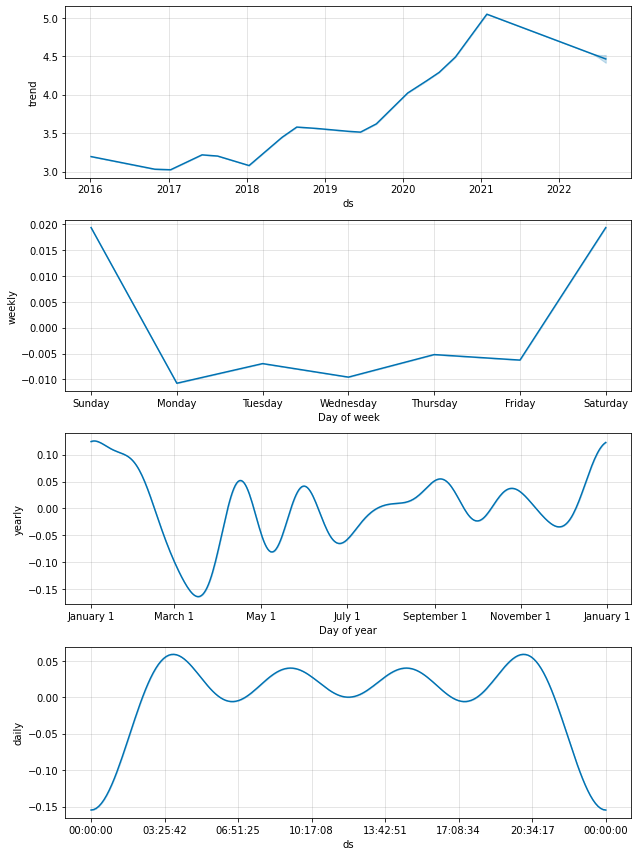

In [173]:
model.plot_components(preds_EDP);#shows the trend over the years, over one year and weekly 

In [174]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [175]:
plot_plotly(model, preds_EDP)

In [176]:
plot_components_plotly(model, preds_EDP)#shows the trend over the years, over one year and weekly 

##### Validating the Forecast

In [177]:
EDPR.info

<bound method DataFrame.info of              High    Low   Open  Close  Volume  Adj Close   Detrend  \
Date                                                                  
2016-01-04  3.244  3.244  3.244  3.244     0.0   2.110836       NaN   
2016-01-05  3.193  3.193  3.193  3.193     0.0   2.077651       NaN   
2016-01-06  3.156  3.156  3.156  3.156     0.0   2.053575       NaN   
2016-01-07  3.170  3.102  3.102  3.170  9750.0   2.062686       NaN   
2016-01-08  3.209  3.209  3.209  3.209     0.0   2.088062       NaN   
...           ...    ...    ...    ...     ...        ...       ...   
2022-05-05  4.406  4.406  4.406  4.406   685.0   4.406000 -1.428934   
2022-05-06  4.242  4.242  4.242  4.242     0.0   4.242000 -2.506036   
2022-05-07  4.242  4.242  4.242  4.242     0.0   4.242000 -2.198566   
2022-05-08  4.242  4.242  4.242  4.242     0.0   4.242000 -1.968131   
2022-05-09  4.411  4.411  4.411  4.411     0.0   4.411000 -0.737752   

            Differencing  Detrend_Diff    MA

In [178]:
dataset_EDP.info

<bound method DataFrame.info of               ds      y
0     2016-01-04  3.244
1     2016-01-05  3.193
2     2016-01-06  3.156
3     2016-01-07  3.170
4     2016-01-08  3.209
...          ...    ...
1651  2022-05-03  4.354
1652  2022-05-04  4.378
1653  2022-05-05  4.406
1654  2022-05-06  4.242
1655  2022-05-09  4.411

[1656 rows x 2 columns]>

In [179]:
'''
# Python
cutoffs = pd.to_datetime(['2017-02-15', '2019-08-15', '2021-02-15'])
df_cv2 = cross_validation(preds_EDP,cutoffs=cutoffs, horizon='365 days')


df_p = performance_metrics(EDPR)
df_p.head()'''

"\n# Python\ncutoffs = pd.to_datetime(['2017-02-15', '2019-08-15', '2021-02-15'])\ndf_cv2 = cross_validation(preds_EDP,cutoffs=cutoffs, horizon='365 days')\n\n\ndf_p = performance_metrics(EDPR)\ndf_p.head()"

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [180]:
dataset_VWS = pd.read_csv('VWS_df.csv')

In [181]:
dataset_VWS = dataset_VWS[['Unnamed: 0', 'Close']].rename(columns = {'Unnamed: 0': 'ds', 'Close': 'y'})
dataset_VWS

ds          y
0     2016-01-04  12.738000
1     2016-01-05  12.716000
2     2016-01-06  12.592000
3     2016-01-07  12.272000
4     2016-01-08  12.000000
...          ...        ...
1651  2022-05-03  23.549999
1652  2022-05-04  23.840000
1653  2022-05-05  23.125000
1654  2022-05-06  22.070000
1655  2022-05-09  20.799999

[1656 rows x 2 columns]

In [182]:
model = Prophet(daily_seasonality=True)
model.fit(dataset_VWS)

In [183]:
future_VWS = model.make_future_dataframe(periods=90) # With this line of code the model will make predictions for the next 90 days
preds_VWS = model.predict(future_VWS)

In [184]:
preds_VWS.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2016-01-04  12.482121   10.101869   14.345171    12.482121    12.482121   
1 2016-01-05  12.487402   10.183796   14.518036    12.487402    12.487402   
2 2016-01-06  12.492682   10.127560   14.372598    12.492682    12.492682   
3 2016-01-07  12.497963   10.038257   14.487034    12.497963    12.497963   
4 2016-01-08  12.503243   10.075533   14.288395    12.503243    12.503243   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  ...  \
0       -0.280702             -0.280702             -0.280702 -0.650876  ...   
1       -0.239922             -0.239922             -0.239922 -0.650876  ...   
2       -0.243601             -0.243601             -0.243601 -0.650876  ...   
3       -0.249497             -0.249497             -0.249497 -0.650876  ...   
4       -0.292966             -0.292966             -0.292966 -0.650876  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0 -0.050324     -0.050324     -0.050324  0.420498      0.420498      0.420498   
1 -0.015797     -0.015797     -0.015797  0.426750      0.426750      0.426750   
2 -0.020367     -0.020367     -0.020367  0.427642      0.427642      0.427642   
3 -0.021581     -0.021581     -0.021581  0.422960      0.422960      0.422960   
4 -0.054649     -0.054649     -0.054649  0.412559      0.412559      0.412559   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  12.201419  
1                         0.0  12.247479  
2                         0.0  12.249082  
3                         0.0  12.248465  
4                         0.0  12.210278  

[5 rows x 22 columns]

In [185]:
preds_VWS.tail(90)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1656 2022-05-10  25.802590   22.924057   27.226197    25.802590    25.802590   
1657 2022-05-11  25.778663   23.072062   27.257488    25.778663    25.778663   
1658 2022-05-12  25.754736   22.806149   27.138987    25.754736    25.754736   
1659 2022-05-13  25.730809   22.881660   27.078276    25.730809    25.730809   
1660 2022-05-14  25.706882   23.029990   27.140195    25.706882    25.706882   
...         ...        ...         ...         ...          ...          ...   
1741 2022-08-03  23.768790   20.925093   25.532077    23.065321    24.338546   
1742 2022-08-04  23.744863   20.735690   25.487859    23.030206    24.336251   
1743 2022-08-05  23.720936   20.676971   25.465608    22.995345    24.327368   
1744 2022-08-06  23.697009   20.984487   25.373132    22.960636    24.318046   
1745 2022-08-07  23.673082   20.981916   25.581182    22.921295    24.308303   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
1656       -0.743105             -0.743105             -0.743105 -0.650876   
1657       -0.738442             -0.738442             -0.738442 -0.650876   
1658       -0.731788             -0.731788             -0.731788 -0.650876   
1659       -0.758791             -0.758791             -0.758791 -0.650876   
1660       -0.618925             -0.618925             -0.618925 -0.650876   
...              ...                   ...                   ...       ...   
1741       -0.548318             -0.548318             -0.548318 -0.650876   
1742       -0.536670             -0.536670             -0.536670 -0.650876   
1743       -0.554813             -0.554813             -0.554813 -0.650876   
1744       -0.401754             -0.401754             -0.401754 -0.650876   
1745       -0.382540             -0.382540             -0.382540 -0.650876   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
1656  ... -0.015797     -0.015797     -0.015797 -0.076432     -0.076432   
1657  ... -0.020367     -0.020367     -0.020367 -0.067199     -0.067199   
1658  ... -0.021581     -0.021581     -0.021581 -0.059331     -0.059331   
1659  ... -0.054649     -0.054649     -0.054649 -0.053266     -0.053266   
1660  ...  0.081359      0.081359      0.081359 -0.049409     -0.049409   
...   ...       ...           ...           ...       ...           ...   
1741  ... -0.020367     -0.020367     -0.020367  0.122924      0.122924   
1742  ... -0.021581     -0.021581     -0.021581  0.135787      0.135787   
1743  ... -0.054649     -0.054649     -0.054649  0.150712      0.150712   
1744  ...  0.081359      0.081359      0.081359  0.167762      0.167762   
1745  ...  0.081359      0.081359      0.081359  0.186976      0.186976   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1656     -0.076432                   0.0                         0.0   
1657     -0.067199                   0.0                         0.0   
1658     -0.059331                   0.0                         0.0   
1659     -0.053266                   0.0                         0.0   
1660     -0.049409                   0.0                         0.0   
...            ...                   ...                         ...   
1741      0.122924                   0.0                         0.0   
1742      0.135787                   0.0                         0.0   
1743      0.150712                   0.0                         0.0   
1744      0.167762                   0.0                         0.0   
1745      0.186976                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
1656                         0.0  25.059485  
1657                         0.0  25.040221  
1658                         0.0  25.022948  
1659                         0.0  24.972018  
1660                         0.0  25.087956  
...                          ...        ...  
1741                       

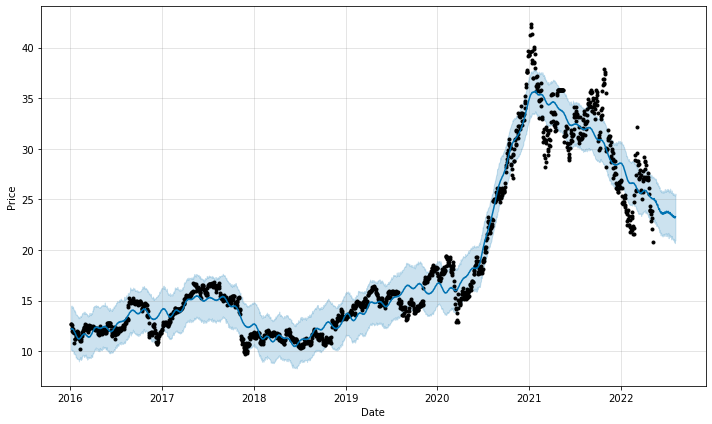

In [186]:
model.plot(preds_VWS, xlabel = 'Date', ylabel = 'Price');

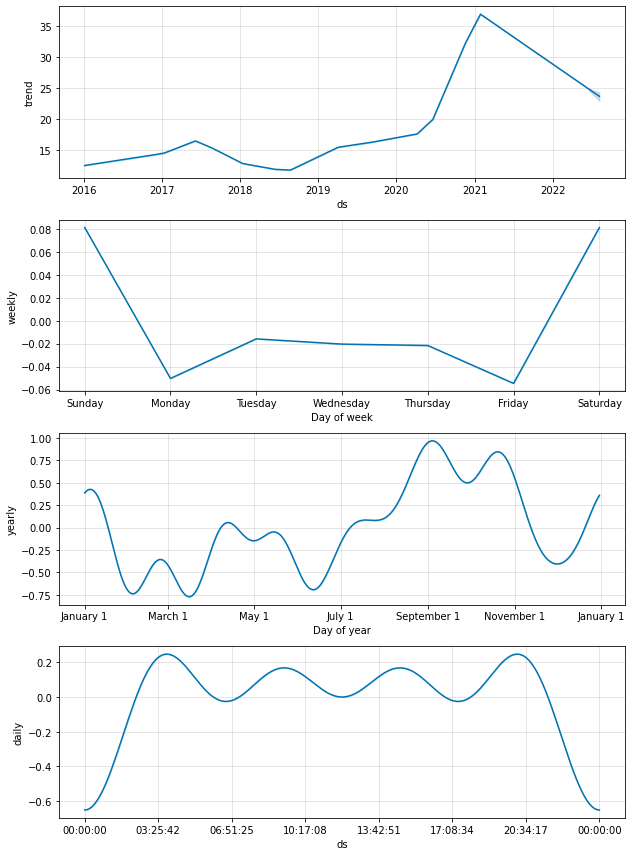

In [187]:
model.plot_components(preds_VWS);#shows the trend over the years, over one year and weekly 

In [188]:
plot_plotly(model, preds_VWS)

## Summary

In [189]:
Validation_EDPR= pd.concat([MA_SES_EDPR, MA_HoltWinters_EDPR,R_arma_EDPR,R_arima_EDPR,R_SARIMAX_EDPR])
Validation_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_SES           0.914556             0.039704            0.003893   
MA_Holt-Winters  0.914490             0.040551            0.003896   
ARMA             0.914576             0.039799            0.003892   
ARIMA            0.914663             0.040271            0.003888   
SARIMA           0.913729             0.041025            0.003931   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_SES                          0.062396                        0.879747  
MA_Holt-Winters                 0.062420                        0.898401  
ARMA                            0.062388                        0.881795  
ARIMA                           0.062357                        0.891876  
SARIMA                          0.062697                        0.909117

In [190]:
Validation_VWS= pd.concat([MA_SES_VWS, MA_HoltWinters_VWS,R_arma_VWS,R_arima_VWS,R_SARIMAX_VWS])
Validation_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_SES           0.943990             0.689059            0.926380   
MA_Holt-Winters  0.943990             0.689059            0.926380   
ARMA             0.021052             3.402260           16.191507   
ARIMA            0.034591             3.378920           15.967569   
SARIMA           0.065783             3.326534           15.451662   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_SES                          0.962487                         2.38855  
MA_Holt-Winters                 0.962487                         2.38855  
ARMA                            4.023867                        11.87409  
ARIMA                           3.995944                        11.77872  
SARIMA                          3.930860                         2.48437

## Complementary Reading

Reference: Efstathopoulos g. (2020) Python for Finance, Part I: Yahoo & Google Finance API, pandas, and matplotlib 
Available at: URL <a href="https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ ">https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ </a>(Accessed 14 October 2021).  

Reference: Witham, J. (2020) The Imperative For A 24/7 Renewable Energy World, Forbes. 
Available at: URL <a href="https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo">https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo/ </a>(Accessed 14 October 2021).  

Reference: Norris, E. (2021) "Why Did My Stock's Ticker Change?", Investopedia. 
Available at: URL <a href="https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/">https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/ </a>(Accessed 14 October 2021).  

Reference: Mahgoub, A. (2021) "Stock Prediction using Regression Algorithm in Python", Medium. 
Available at: URL <a href="https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9/">https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9</a>(Accessed 25 Feb 2022). 

Reference: Prabhakaran, S. (2019) "Augmented Dickey Fuller Test (ADF Test) – Must Read Guide", Medium. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.">https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.</a>

Reference: Masum, M. (2020) "Time Series Analysis: Identifying AR and MA using ACF and PACF Plots", Medium. 
Available at: URL <a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8</a> (Accessed 21 March 2022).  

Reference: Zvornicanin E. (2021) "Choosing the best q and p from ACF and PACF plots in ARMA-type modeling", Baeldung. 
Available at: URL <a href="https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling">https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling</a> (Accessed 21 March 2022). 


Reference: Prabhakaran S. (2021) "ARIMA Model – Complete Guide to Time Series Forecasting in Python", Machinelearningplus. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/">https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/</a> (Accessed 21 March 2022). 

Reference: Daitan (2019) "A Visual Guide to Time Series Decomposition Analysis", Betterprogramming 
Available at: URL <a href="https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930">https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930</a> (Accessed 14 April 2022).

Reference: Zach (2021) "Augmented Dickey-Fuller Test in Python (With Example)", Statology.org 
Available at: URL <a href="https://www.statology.org/dickey-fuller-test-python/">https://www.statology.org/dickey-fuller-test-python/</a> (Accessed 14 April 2022).

Reference: Shao, V.(2020) "Forecasting with a Time Series Model using Python: Part One", Bounteous
Available at: URL <a href="https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/">https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/</a> (Accessed 15 April 2022).
